# **Estudo sobre denúncias de violência contra mulher no primeiro semestre de 2023**

A base de dados refere-se ao volume de denúncias registradas pelos canais de atendimento da Ouvidoria Nacional de Direitos Humanos (ONDH), neste caso, filtrando apenas os microdados das denúncias de violência contra a mulher e violência doméstica e familiar contra a mulher registrados pelo Ligue 180 e outros canais.

A relação de registros exibe dados do suspeito, da vítima e de algumas circuntâncias das denúncias.

O objetivo dela é aprofundar nossa compreensão sobre as estatísticas, visando desenvolver estratégias para conscientizar a sociedade sobre o tema. Para isso, foram utilizadas técnicas exploratórias e estatísticas em Python com algumas limitações devido à dados incompletos não declarados na maior parte das
denúncias.

Fonte dos dados: https://www.gov.br/mdh/pt-br/acesso-a-informacao/dados-abertos/ligue180

Acesso ao arquivo no drive: https://drive.google.com/file/d/1PfReJfGnkpR-3bL-Z_FkS3H1Z60RAXkW/view?usp=share_link

# **1 - Aspectos Iniciais:**

### 1.1 - Importação das bibliotecas necessárias e da base de dados:

In [ ]:
# Bibliotecas para manipulacao de dados
import pandas as pd
import numpy as np
import gdown

#biblioteca para representação de data e hora como objeto de tempo numerico:
from datetime import datetime

# Bibliotecas para visualizacao
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skalearn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as mticker
import matplotlib.font_manager as fm


# Bibliotecas de preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Bibliotecas de modelagem
from sklearn.tree import DecisionTreeClassifier

# Ignorar Avisos
import warnings

warnings.filterwarnings("ignore")

# Configurações no pandas
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

# Configurações no Matplot
plt.rcParams["figure.figsize"] = (15, 6)
plt.style.use("ggplot")


### 1.2 - Acessando a base de dados:

In [ ]:
#conecta ao Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#faz a leitura/importação da base de dados:
data = pd.read_csv('/content/drive/MyDrive/Estudos/Python/Datasets/dados-denuncia-violencia-mulher-primeiro-semestre-2023.csv', on_bad_lines='skip', sep = ';')

### 1.3 - Conhecendo o dataset:

In [ ]:
#consulta o tamanho da base (linhas, colunas):
data.shape

(1666513, 62)

In [ ]:
#faz a leitura dos primeiros 5 registros da base de dados
data.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,Início_das_violações,sl_quantidade_vitimas,Grupo_vulnerável,Motivação,Relação_vítima_suspeito,...,Suspeito_preso,País_do_suspeito,UF_do_suspeito,sl_suspeito_municipio,Profissão_do_suspeito,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,C544D154B72CE149B757BDA576FDDE2C6E964D2095E38A...,2023-01-16 13:10:49.980,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,RN,240800 | MOSSORÓ,OCASIONALMENTE,HÁ MAIS DE UM ANO,1,VIOLÊNCIA CONTRA A MULHER,AGRAVANTE.POR CONDUTAS EXCESSIVAS/DESNECESSÁRI...,OUTROS,...,NÃO,BR | BRASIL,RN,240800 | MOSSORÓ,OUTROS NÃO LISTADOS,NaN,NaN,PRETA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO
1,7C0A5EABEFB042E97F2F6878F18350C9EB23D0E1424DA5...,2023-04-13 19:18:01.150,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,BA,292740 | SALVADOR,DIARIAMENTE,HÁ UM MÊS,2,VIOLÊNCIA CONTRA CRIANÇA OU ADOLESCENTE,NaN,MÃE,...,NÃO INFORMADO,BR | BRASIL,BA,292740 | SALVADOR,OUTROS NÃO LISTADOS,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
2,5E7FAFF02AFF5A2F7F121FA78FE3472D039305DEC9C863...,2023-04-17 19:26:13.403,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,RJ,330455 | RIO DE JANEIRO,OCASIONALMENTE,HÁ MAIS DE CINCO ANOS,1,VIOLÊNCIA CONTRA A MULHER,MOTIVAÇÃO.EM RAZÃO DE CONFLITO DE IDEIAS,EX-COMPANHEIRO(A),...,NÃO INFORMADO,BR | BRASIL,DENUNCIANTE NÃO SOUBE INFORMAR,DENUNCIANTE NÃO SOUBE INFORMAR,OUTROS NÃO LISTADOS,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>INSUBSISTÊNCIA AFETIVA
3,4746DBA4CDE054A403FF1BCD40C520C8474FACBBE15495...,2023-03-18 17:19:59.397,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,LOCAL DE TRABALHO DA VÍTIMA,BR | BRASIL,BA,293305 | VÁRZEA DA ROÇA,DIARIAMENTE,HÁ MAIS DE DEZ ANOS,1,VIOLÊNCIA CONTRA PESSOA COM DEFICIÊNCIA,MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO....,EMPREGADOR/PATRÃO (HIERARQUICAMENTE SUPERIOR),...,NÃO INFORMADO,BR | BRASIL,RO,110034 | ALVORADA DOESTE,"TRABALHADOR DO SETOR PRIMÁRIO (AGRICULTURA, PE...",NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO
4,059F9A9FAF34A5C9C41CEDCF7F9DA3EFA6764CC9F3D632...,2023-04-03 12:58:00.647,TELEFÔNICO,NÃO,TERCEIRO,UNIDADE PRISIONAL,BR | BRASIL,ES,320520 | VILA VELHA,DIARIAMENTE,HÁ UM MÊS,1,"VIOLÊNCIA CONTRA CIDADÃO, FAMÍLIA OU COMUNIDADE",AGRAVANTE.COM HUMILHAÇÃO,DIRETOR(A) DE UNIDADE PRISIONAL,...,NaN,BR | BRASIL,ES,320520 | VILA VELHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SEGURANÇA PÚBLICA, FORÇAS ARMADAS, DEFESA CIVI...",NaN,NaN,DIREITOS SOCIAIS>EDUCAÇÃO


In [ ]:
# Criar um DataFrame com informações sobre o DataFrame original
info_df = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.notnull().sum(),
    'Dtype': data.dtypes
})

# Mostrar o DataFrame
info_df.style.set_properties(**{'text-align': 'left'})


,Column,Non-Null Count,Dtype
hash,hash,1666513,object
Data_de_cadastro,Data_de_cadastro,1666513,object
Canal_de_atendimento,Canal_de_atendimento,1666513,object
Denúncia_emergencial,Denúncia_emergencial,1666513,object
Denunciante,Denunciante,1666170,object
Cenário_da_violação,Cenário_da_violação,1664356,object
País,País,1666400,object
UF,UF,1665237,object
Município,Município,1664723,object
Frequência,Frequência,1661950,object


In [ ]:
#exibe todas as colunas e a quantidade de campos únicos em cada uma delas:
pd.set_option('display.max_rows', None)
data.nunique()

hash                                              253767
Data_de_cadastro                                  167519
Canal_de_atendimento                                  12
Denúncia_emergencial                                   4
Denunciante                                            3
Cenário_da_violação                                   31
País                                                  34
UF                                                    29
Município                                           4896
Frequência                                             6
Início_das_violações                                   8
sl_quantidade_vitimas                                  2
Grupo_vulnerável                                       8
Motivação                                             66
Relação_vítima_suspeito                               52
sl_vitima_cadastro                                     2
Sexo_da_vítima                                         5
Orientação_sexual_da_vítima    

# **2 - Análise Exploratória:**

Como são muitos dados, preferi adotar uma boa prática de otimizar a apresentação e análise dos dados. A forma de tornar a análise mais organizada que escolhi pra contar uma história mais clara foi agrupar as colunas por categorias e realizar a análise em etapas. Outro ponto é que esses dados são utilizados em sua grande maioria para serem exibidos num painel do próprio governo (https://www.gov.br/mdh/pt-br/acesso-a-informacao/dados-abertos), por isso, em sua maioria, são dados do tipo "object", mas para a análise precisamos mudar o tipo de dado. Isso será feito enquanto exploramos as colunas.

### 2.1 - Análise do Tempo:

In [ ]:
#converte os dados dessa coluna de "object" para "date":
data['Data_de_cadastro']= pd.to_datetime(data['Data_de_cadastro'], utc=True).dt.tz_convert('America/Sao_Paulo')

In [ ]:
#avaliando período dos registros da base de dados:
inicio = pd.to_datetime(data['Data_de_cadastro']).dt.date.min()
fim = pd.to_datetime(data['Data_de_cadastro']).dt.date.max()

print(f"Temos dados de {inicio} a {fim}")

Temos dados de 2022-12-31 a 2023-06-30


Vamos observar como esses dados se comportam quando plotamos um gráfico com o volume de denúncias por dia de 31/12/2022 até 30/06/2023. A ideia é tentar identificar algum comportamento que permita inferências relevantes.

In [ ]:
#agrupa os dados por data:
dados_por_data = data.groupby(data['Data_de_cadastro'].dt.date).size()

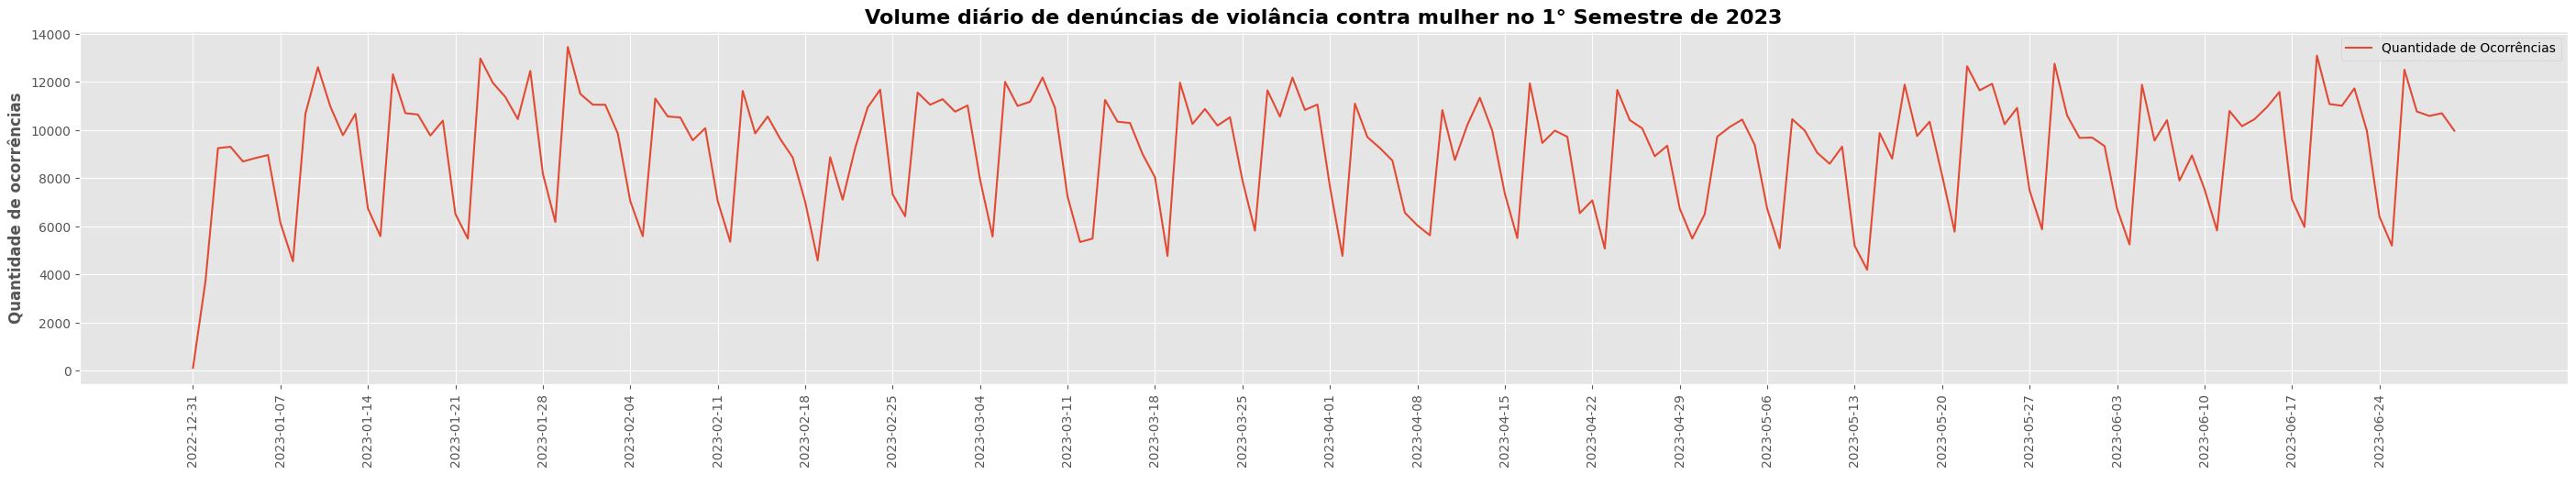

In [ ]:
#gráfico para analisar volume de denúncias no decorrer do tempo (por dia):
fig, axs = plt.subplots(figsize=(35,5))
sns.lineplot(x=dados_por_data.index, y=dados_por_data.values, label='Quantidade de Ocorrências')
plt.title('Volume diário de denúncias de violância contra mulher no 1° Semestre de 2023', fontsize=16, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade de ocorrências', fontsize=12, fontweight='bold', ha='center' )


step = 7  #define de quanto em quantos dias ele exibe a data no eixo x.
xticks = dados_por_data.index[::step]
axs.set_xticks(xticks)
axs.set_xticklabels(xticks, rotation=90) #rotaciona os rótulos para facilitar a leitura

plt.show()

Aqui é possível observar que temos um gráfico com um padrão sazonal, comum em dados temporais. Escolhi chamar meu caso de sazonalidade semanal. Para compreender melhor como os dados mudam no decorrer da semana, vamos plotar outro gráfico.

In [ ]:
#adiciona as dataframe a coluna "dia_da_semana" usando a data_de_cadastro e agrupa a quantidade por dias da semana:
data['Dia_da_semana'] = data['Data_de_cadastro'].dt.day_name()
denuncias_por_dia = data.groupby('Dia_da_semana').size()

print(data['Dia_da_semana'].value_counts())

Monday       288939
Wednesday    273330
Tuesday      268187
Thursday     262773
Friday       257451
Saturday     177319
Sunday       138514
Name: Dia_da_semana, dtype: int64


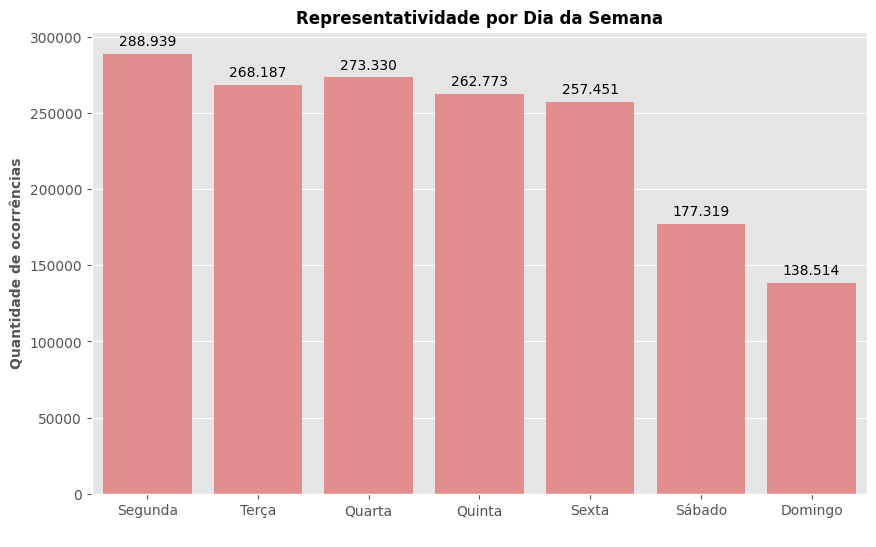

In [ ]:
#garante que os dias sejam plotados em ordem sequencial que, por padrão retornaram em inglês no dt.day_name() como visto no print gerado anteriormente:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#plota um gráfico de barras com os dias da semana:
fig, axs = plt.subplots(figsize=(10, 6))
bars = sns.barplot(x=denuncias_por_dia.index, y=denuncias_por_dia.values, order=order, ax=axs, color="lightcoral")
plt.title('Representatividade por Dia da Semana', fontsize=12, fontweight='bold')
axs.set_xlabel(' ', fontsize=10, fontweight='bold')
axs.set_ylabel('Quantidade de ocorrências', fontsize=10, fontweight='bold')
axs.set_xticklabels(['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])

# Adiciona os números em cima das barras com pontos como separadores de milhar
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')  # Formata com vírgula e depois substitui por ponto
    bars.annotate(value,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

Acima, fica bem evidente como o volume de denúncias decai no fim de semana. Essa queda pode ocorrer por inúmeros fatores, eu levantaria hipóteses como cultura familiar de encontros e atividades em grupo, mudanças no acesso à serviço de apoio aos fins de semana, reflexão e tomada de decisão da vítima, estigmatização, vergonha ou medo de represálias e outras barreiras culturais e sociais.

In [ ]:
#realiza o cálculo do total de denúncias durante a semana e no fim de semana:
denuncias_semana = denuncias_por_dia[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
denuncias_fim_semana = denuncias_por_dia[['Saturday', 'Sunday']].sum()

#pecentual:
percentual_queda = (denuncias_semana - denuncias_fim_semana) / denuncias_semana * 100

print(f"A queda percentual de denúncias do fim de semana em relação à semana é de {percentual_queda:.2f}%.")

A queda percentual de denúncias do fim de semana em relação à semana é de 76.62%.


Mudando um pouco a abordagem, vamos observar como o dataframe se comporta semanal e mensalmente. Para lidar com a sazonalidade, decidi realizar a média móvel dos dados e avaliar o comportamento do gráfico.

In [ ]:
new_df = data.groupby(data['Data_de_cadastro'].dt.date).size().reset_index()
new_df.columns=['data', 'denuncias']
new_df.head()

,data,denuncias
0,2022-12-31,117
1,2023-01-01,3721
2,2023-01-02,9241
3,2023-01-03,9296
4,2023-01-04,8686


In [ ]:
#define a coluna de data como índice:
new_df.set_index('data', inplace=True)

#garante que o DataFrame tenha um índice de data contínuo:
new_df = new_df.reindex(pd.date_range(start=new_df.index.min(), end=new_df.index.max(), freq='D'))

#calcula a média móvel de 7 dias:
new_df['Media_Movel_7D'] = new_df['denuncias'].rolling(window=7).mean()
new_df.head()

,denuncias,Media_Movel_7D
2022-12-31,117,NaN
2023-01-01,3721,NaN
2023-01-02,9241,NaN
2023-01-03,9296,NaN
2023-01-04,8686,NaN


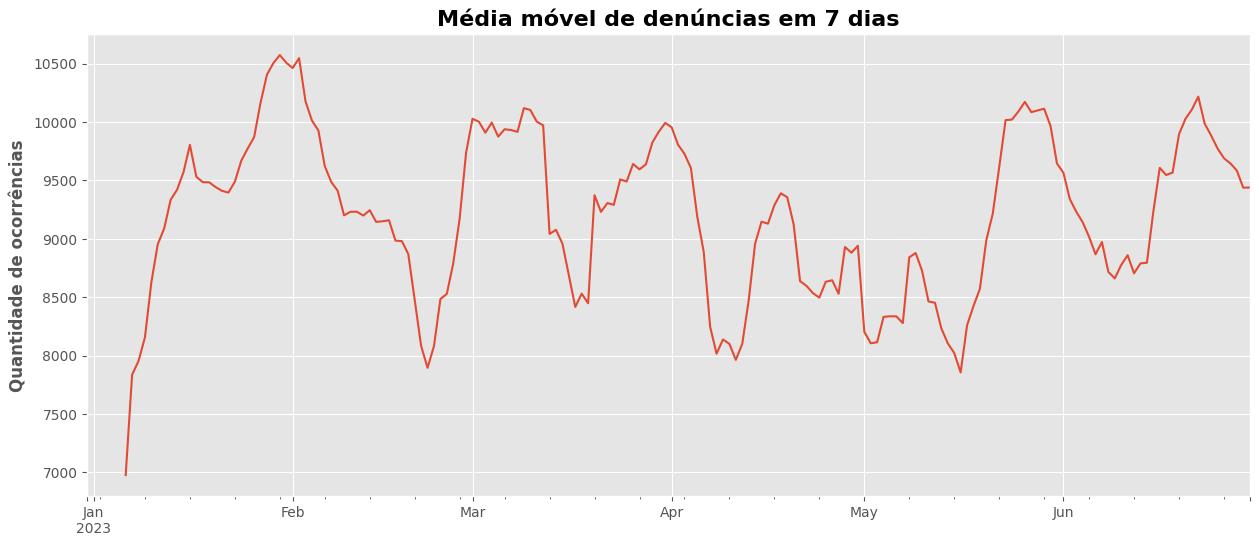

In [ ]:
# Plote o gráfico novamente
new_df.Media_Movel_7D.plot()
plt.title('Média móvel de denúncias em 7 dias', fontsize=16, fontweight='bold')
plt.ylabel('Quantidade de ocorrências', fontsize=12, fontweight='bold', ha='center')
plt.show()

Aqui, podemos observar uma leve queda no volume total no mês de Maio, ainda muito sutil, mas evidentemente menor que o pico no mês de Janeiro, que pode estar muito relacionado com ao comportamento das pessoas em início de ano com renovações e projetos de médio/longo prazo para o ano que se inicia.

In [ ]:
#calcula a média móvel de 28 dias
new_df['Media_Movel_28D'] = new_df['denuncias'].rolling(window=28).mean()
new_df.head()

,denuncias,Media_Movel_7D,Media_Movel_28D
2022-12-31,117,NaN,NaN
2023-01-01,3721,NaN,NaN
2023-01-02,9241,NaN,NaN
2023-01-03,9296,NaN,NaN
2023-01-04,8686,NaN,NaN


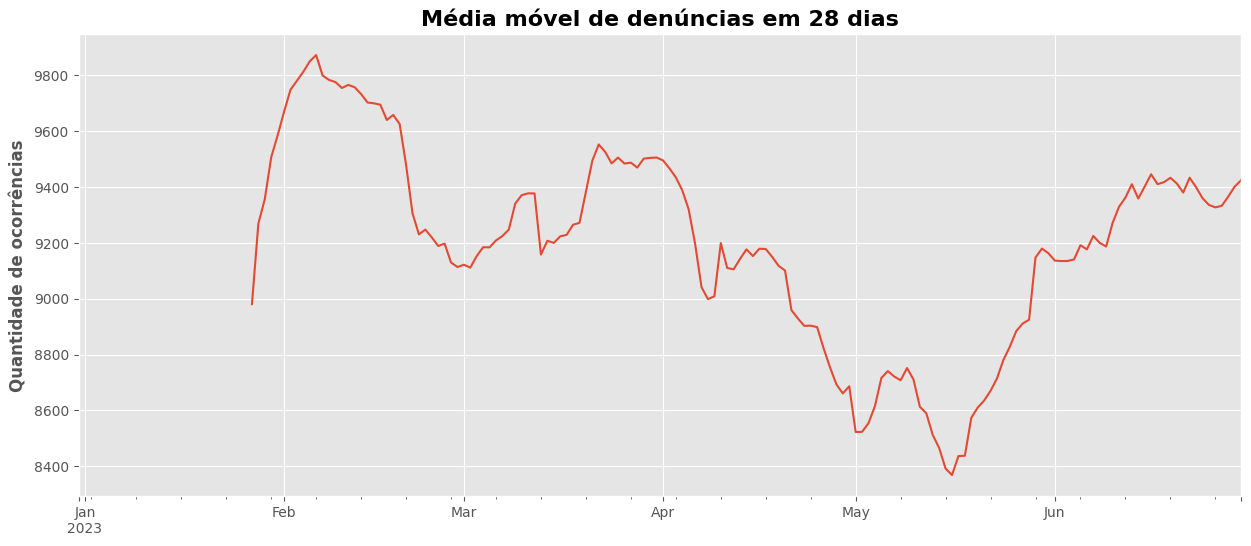

In [ ]:
# Plote o gráfico novamente
new_df.Media_Movel_28D.plot()
plt.title('Média móvel de denúncias em 28 dias', fontsize=16, fontweight='bold')
plt.ylabel('Quantidade de ocorrências', fontsize=12, fontweight='bold', ha='center')
plt.show()

Utilizando a média móvel numa janela de 28 dias é possível observar como realmente o mês de **Maio carrega uma diminuição no volume de denúncias**. Claro que, o idela seria estar trabalhando com um dataaset de anos de registros, mas podemos levantar algumas hipóteses para esse comportamento do gráfico:

Datas comemorativas, em Janeiro temos as **promessas de início de ano** que podem influenciar na tomada de decisão de denúncia, em Fevereiro, com o **alto tráfego de pessoas e turistas**, infelizmente podemos ter um volume considerável de casos e denúncias. O início do ano também é marcado pode despesas como IPVA, IPTU, material escolar que pode gerar um **estresses financeiros** nas famílias podendo ser um gatilho para conflitos.

A **volta às aulas** também pode afetar a dinâmica da família e influenciar no número de denúncias.

Sobre o mês de Maio, um dos eventos que mais chamam a atenção é o **Dia das Mães**, uma data que pode influenciar em campanhas de conscientização ou ênfase na celebração familiar.

E não podemos descartar as **condições climáticas**, o Brasil é um país diverso e meses como Abril e Maio podem ser mais frios ou quentes, isso também influenciaria na dinâmica familiar seja na busca por ajuda presencialmente fora de casa ou maior disposição para eventos em público e menor permanência em casa.

### 2.2 - Análise dos Canais de Atendimento:

Mesmo sendo pouco difundido, o disque denúncia 180 não é o único recurso de socorro que existe. Há outros portais de acesso às vitimas para realização das denúncias.

In [ ]:
#agrupa os diferentes tipos de registros da coluna, calcula sua quantidade e exibe em ordem decrescente.
data['Canal_de_atendimento'].value_counts()

TELEFÔNICO            1513139
WHATSAPP                86066
WEBCHAT                 23187
PORTAL                  20698
E-MAIL                  16810
TELEGRAM                 2090
APLICATIVO               2089
CARTA                    1327
PRESENCIAL                949
VIDEOCHAMADA              100
PROCESSO SEI               56
AUTUAÇÃO DE OFÍCIO          2
Name: Canal_de_atendimento, dtype: int64

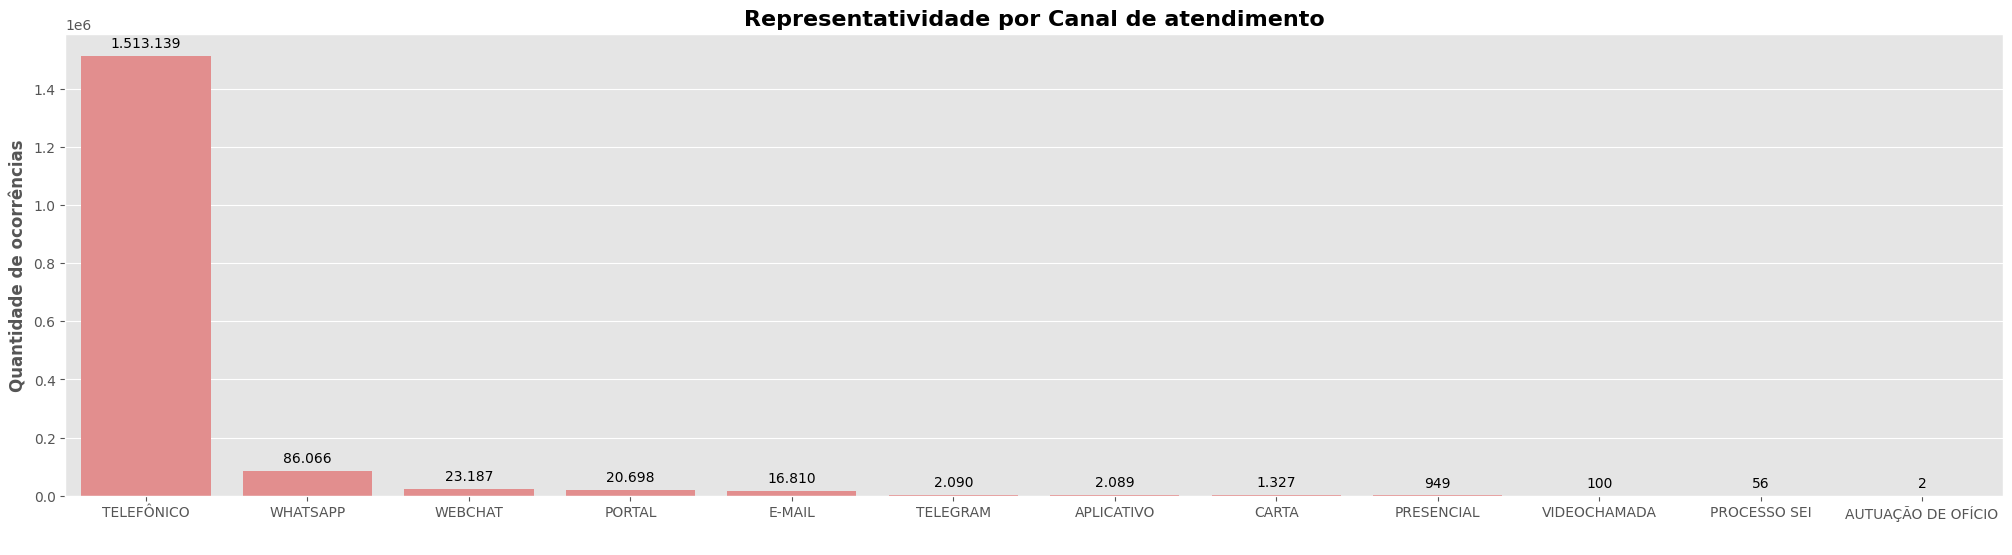

In [ ]:
fig, axs = plt.subplots(figsize=(25, 6))

# Criando as barras
bars = sns.countplot(x=data['Canal_de_atendimento'], order=data['Canal_de_atendimento'].value_counts().index, ax=axs, color="lightcoral")

# Adiciona o título
plt.title('Representatividade por Canal de atendimento', fontsize=16, fontweight='bold')

# Define os rótulos dos eixos
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade de ocorrências', fontsize=12, fontweight='bold')

# Adiciona os números em cima das barras com pontos como separadores de milhar
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.show()

O telefone ainda é o meio de denúncias mais utilizado, mas há espaço para outros canais.
De acordo com a pesquisa Digital 2022, o número de usuários ativos no WhatsApp no Brasil é de 165 milhões de pessoas, 96,4% da população brasileira. Portanto, é possível que haja espaço para mais campanhas de conscientização do canal como um outro meio para vítimas denunciarem seus agressores.

### 2.3 - Caráter Emergencial da denúncia:

In [ ]:
data['Denúncia_emergencial'].value_counts()

NÃO                                                            1610069
RISCO IMINENTE DE MORTE DA VÍTIMA                                44121
SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - SEM FREQUÊNCIA      11746
VÍTIMA EM SANGRAMENTO                                              577
Name: Denúncia_emergencial, dtype: int64

No caso desse dado, optei por trabalhar com condições de "se emergencia" para que pudesse ter mais clareza sobre o volume de ocorrências em situações de carácter emergencial.

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Denúncia_emergencial'] = data['Denúncia_emergencial'].astype('category')

#pega uma lista e a transforma numa nova lista, dessa vez, com índices numéricos:
data['Denúncia_emergencial'] = data['Denúncia_emergencial'].map({ 'NÃO' : 'NÃO',
                                                                  'SITUAÇÃO FLAGRANTE - ATÉ 24H DA OCORRÊNCIA - SEM FREQUÊNCIA' : 'NÃO',
                                                                  'RISCO IMINENTE DE MORTE DA VÍTIMA' : 'SIM',
                                                                  'NaN' : 'NÃO',
                                                                  'VÍTIMA EM SANGRAMENTO' : 'SIM'})
data['Denúncia_emergencial'].value_counts()

NÃO    1621815
SIM      44698
Name: Denúncia_emergencial, dtype: int64

In [ ]:
#total de entradas:
total_entries = data['Denúncia_emergencial'].count()

#volume de entradas 'SIM' e 'NÃO':
counts = data['Denúncia_emergencial'].value_counts()

#percentuais de cada um:
percent_sim = (counts['SIM'] / total_entries) * 100
percent_nao = (counts['NÃO'] / total_entries) * 100

print(f"Denúncias emergenciais (SIM): {percent_sim:.2f}%")
print(f"Denúncias não emergenciais (NÃO): {percent_nao:.2f}%")

Denúncias emergenciais (SIM): 2.68%
Denúncias não emergenciais (NÃO): 97.32%


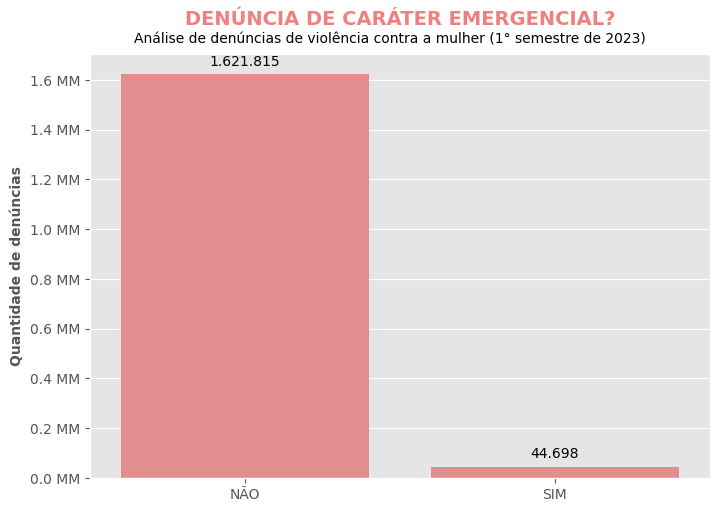

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# gráfico para analisar representatividade:
fig, axs = plt.subplots(figsize=(8, 5.5))

# Criando as barras:
bars = sns.countplot(x=data['Denúncia_emergencial'], order=data['Denúncia_emergencial'].value_counts().index, ax=axs, color="lightcoral")

# Use a fonte padrão do ambiente do Colab
plt.rcParams['font.family'] = 'sans-serif'

# Adiciona o título:
plt.title('DENÚNCIA DE CARÁTER EMERGENCIAL?', fontsize=14, fontweight='bold', y=1.05, color="lightcoral")

# Adiciona um subtítulo:
plt.suptitle('Análise de denúncias de violência contra a mulher (1° semestre de 2023)', fontsize=10, y=0.92, linespacing=1.5)

# Define os rótulos dos eixos:
axs.set_xlabel(' ', fontsize=10, fontweight='bold')
axs.set_ylabel('Quantidade de denúncias', fontsize=10, fontweight='bold')

# Adiciona os números em cima das barras com pontos como separadores de milhar:
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')

# Ajusta a formatação do eixo Y
def millions_formatter(x, pos):
    return '{:.1f} MM'.format(x * 1e-6)
axs.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()


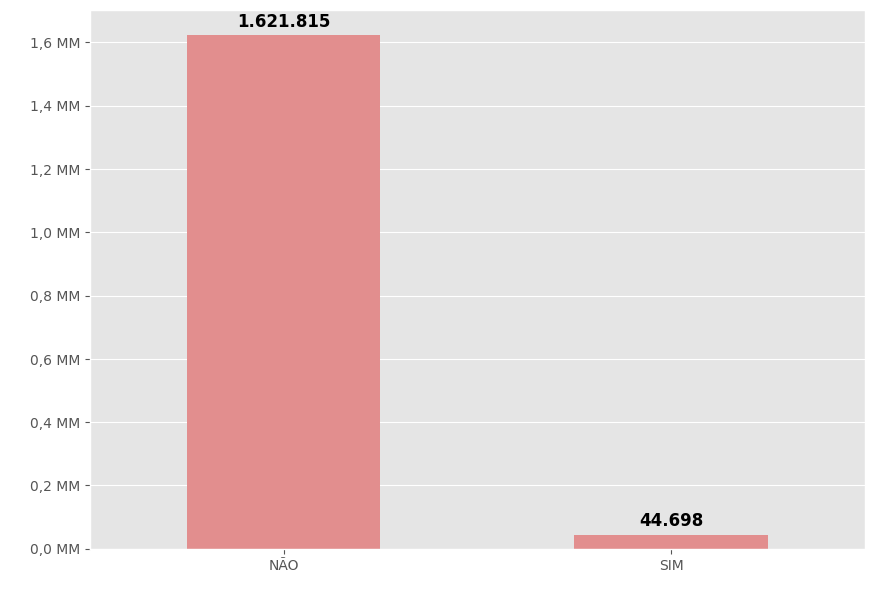

In [ ]:
# gráfico para analisar representatividade:
fig, axs = plt.subplots(figsize=(10, 7))

# Criando as barras:
bars = sns.countplot(x=data['Denúncia_emergencial'], order=data['Denúncia_emergencial'].value_counts().index, ax=axs, color="lightcoral", width=0.5)

# Use a fonte padrão do ambiente do Colab
plt.rcParams['font.family'] = 'sans-serif'

# Adiciona o título:
#plt.title('DENÚNCIA DE CARÁTER EMERGENCIAL?', fontsize=14, fontweight='bold', y=1.05, color="lightcoral")

# Adiciona um subtítulo:
#plt.suptitle('Análise de denúncias de violência contra a mulher (1° semestre de 2023)', fontsize=10, y=0.92, linespacing=1.5)

# Define os rótulos dos eixos:
axs.set_xlabel(' ', fontsize=10, fontweight='bold')
axs.set_ylabel(' ', fontsize=10, fontweight='bold')

# Adiciona os números em cima das barras com pontos como separadores de milhar:
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontweight='bold', fontsize=12,
                  xytext=(0, 10),
                  textcoords='offset points')

# Ajusta a formatação do eixo Y
def millions_formatter(x, pos):
    return '{:.1f} MM'.format(x * 1e-6).replace('.', ',')
axs.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()


Para casos emergenciais e não emergencias é necessário um a certa cautela.

É possível que haja **subnotificação**, pois como o canal mais utilizado é o telefone, numa situação emergencial dificilmente à vítima tem acesso à um telefone para efetuar a denúncia imediatamente. E também, **em casos de necessidade de socorro à vítima pode optar por ligar para a polícia militar** ou outro recurso de socorro como emergência, SAMU...

A natureza da violência também pode interferir, podendo ter caráter psicológico ou emocional. Assim como a **tolerância à violência** ou a visão de que certos comportamentos abusivos são "normais".

### 2.4 - Sobre o denunciante:


In [ ]:
#agrupa os diferentes tipos de registros da coluna, calcula sua quantidade e exibe em ordem decrescente.
data['Denunciante'].value_counts()

TERCEIRO              1327961
A PRÓPRIA VÍTIMA       336609
O PRÓPRIO AGRESSOR       1600
Name: Denunciante, dtype: int64

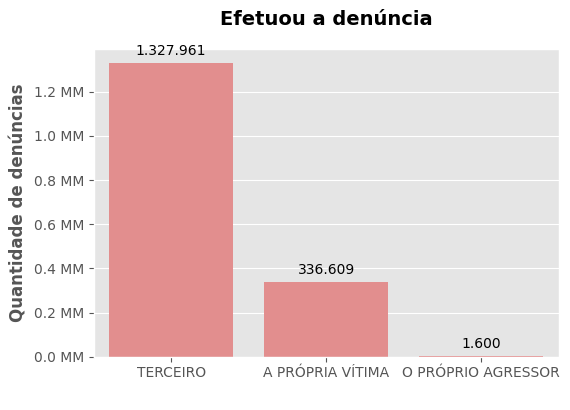

In [ ]:
#gráfico para analisar representatividade:
fig, axs = plt.subplots(figsize=(6, 4))

# Criando as barras:
bars = sns.countplot(x=data['Denunciante'], order=data['Denunciante'].value_counts().index, ax=axs, color="lightcoral")

# Adiciona o título:
plt.title('Efetuou a denúncia', fontsize=14, fontweight='bold', y=1.05)

# Define os rótulos dos eixos:
axs.set_xlabel(' ', fontsize=10, fontweight='bold')
axs.set_ylabel('Quantidade de denúncias', fontsize=12, fontweight='bold')

# Adiciona os números em cima das barras com pontos como separadores de milhar:
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# Ajusta a formatação do eixo Y
def millions_formatter(x, pos):
    return '{:.1f} MM'.format(x * 1e-6)
axs.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

Menos de 1% das denúncias são feitas pelo próprio agressor e visualmente a maior parte das denúncias são feitas por um terceiro.

As possibilidades nesses casos além do estigma, vergonha, medo e represálias já citados anteriormente, pode haver **desinformação**, nem sempre às vítimas tem clareza sobre seus direitos, ou a própria **visibilidade para terceiros** como barulhos, hematomas ou mudanças comportamentais significativas podem ocasionar na denúncia além de poderem ter uma visão mais objetiva da situação. Isso sem descastar que esses **terceiros residam na mesma casa ou terreno e possuam vínculo familiar**.

### 2.4 - Cenários de violação:

Como vimos anteriormente, o respondável por efetuar à denúncia, muitas vezes é um terceiro, portanto, **há a possibilidade de que as violações sejam feitas em cenários diversos**. É possível que quando ocorrida num contexto público, o denunciante se sinta motivado à intervir. Por isso, é importante avaliar esses cenários.

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Cenário_da_violação'] = data['Cenário_da_violação'].astype('category')

# Configurações no pandas
pd.set_option("display.max_rows", 60)

data['Cenário_da_violação'].value_counts()

CASA ONDE RESIDE A VÍTIMA E O SUSPEITO                  854975
CASA DA VÍTIMA                                          488108
CASA DO SUSPEITO                                         62589
VIA PÚBLICA                                              34615
INSTITUIÇÃO DE ENSINO                                    29832
UNIDADE PRISIONAL                                        28734
AMBIENTE VIRTUAL (NO ÂMBITO DA INTERNET)                 26756
OUTROS                                                   20682
ESTABELECIMENTO DE SAÚDE                                 16580
LOCAL DE TRABALHO DA VÍTIMA                              15725
CASA DE FAMILIARES                                       13063
INSTITUIÇÃO DE LONGA PERMANÊNCIA DE IDOSO - ILPI         12796
ÓRGÃOS PÚBLICOS                                          11719
ESTABELECIMENTO COMERCIAL                                11021
LOCAL DE TRABALHO DO AGRESSOR                             6881
CASA DE TERCEIRO                                       

In [ ]:
data['Cenário_da_violação'].value_counts().sum()

1664356

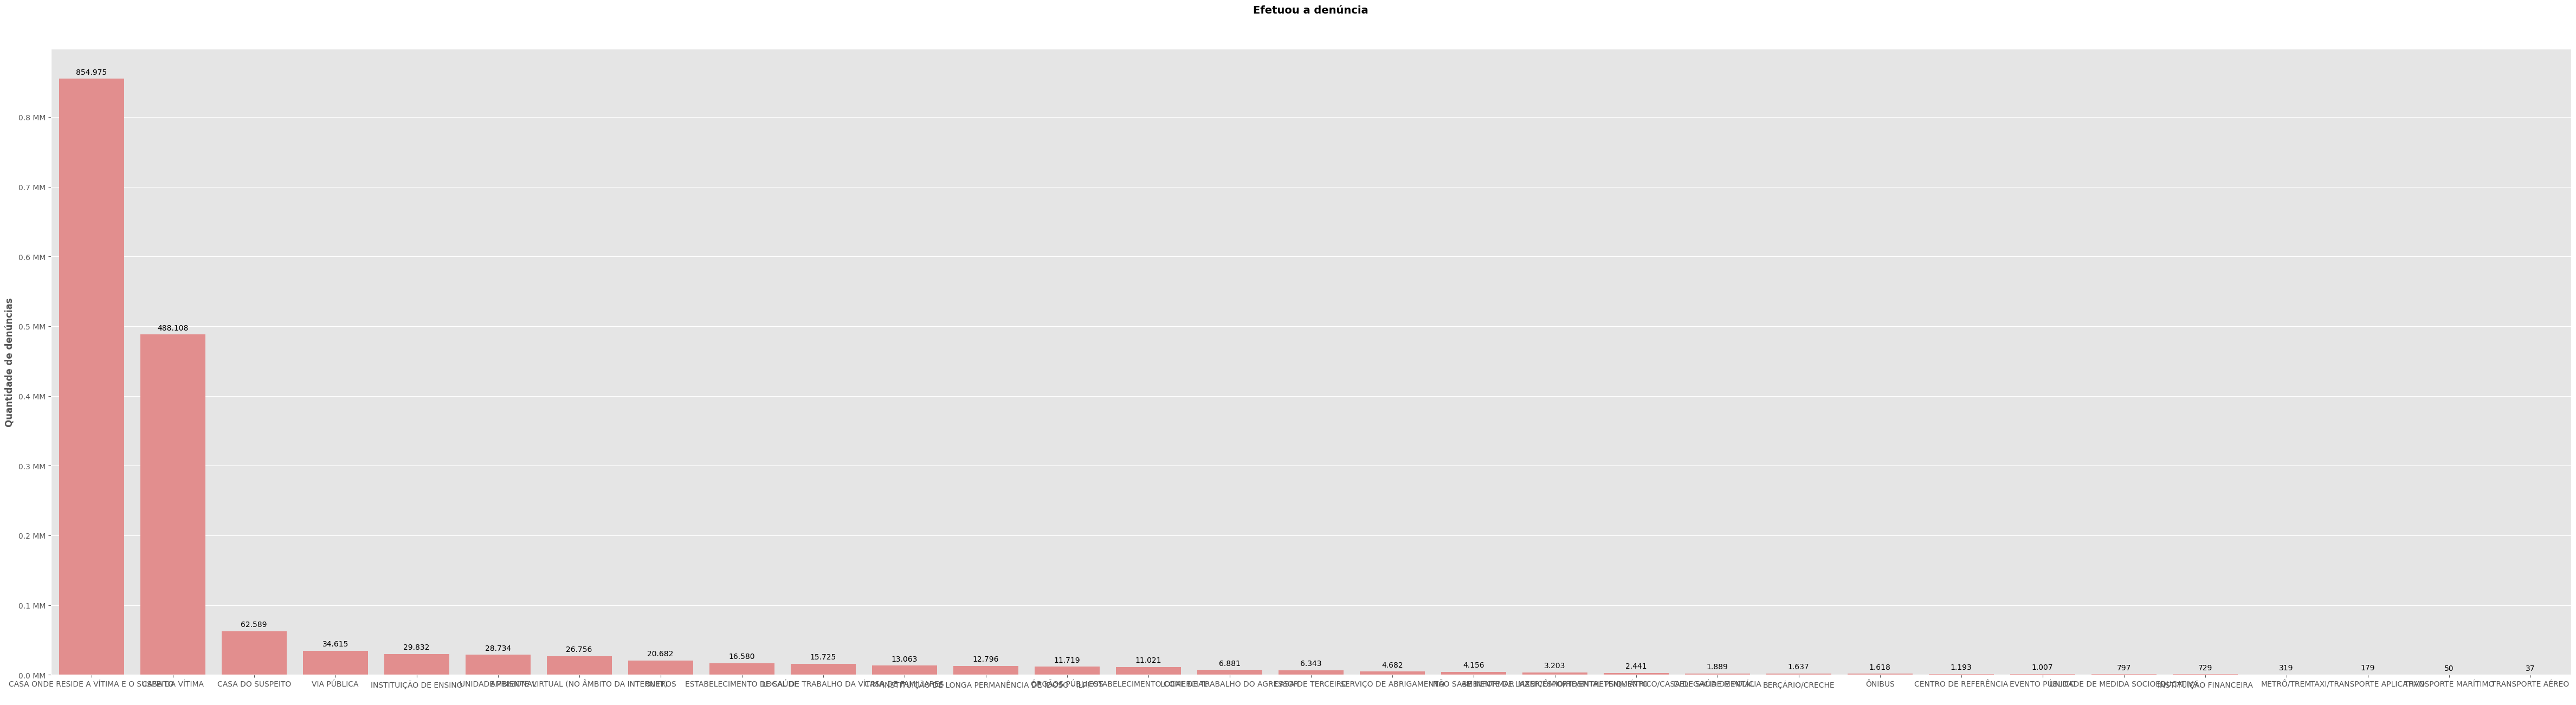

In [ ]:
#gráfico para analisar representatividade:
fig, axs = plt.subplots(figsize=(60, 15))

# Criando as barras:
bars = sns.countplot(x=data['Cenário_da_violação'], order=data['Cenário_da_violação'].value_counts().index, ax=axs, color="lightcoral")

# Adiciona o título:
plt.title('Efetuou a denúncia', fontsize=14, fontweight='bold', y=1.05)

# Define os rótulos dos eixos:
axs.set_xlabel(' ', fontsize=10, fontweight='bold')
axs.set_ylabel('Quantidade de denúncias', fontsize=12, fontweight='bold')

# Adiciona os números em cima das barras com pontos como separadores de milhar:
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# Ajusta a formatação do eixo Y
def millions_formatter(x, pos):
    return '{:.1f} MM'.format(x * 1e-6)
axs.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

Esses dados evidenciam o quanto o perfil do agressor está associado à uma potencial relação próxima da vítima, o que potencialmente pode dificultar o acesso aos canais de denúncia, ou mesmo impossibilitar a vítima emocionalmente de lidar com a situação. Além disso, além de residências, o outro ambiente com denuncias é a internet, inclusive pela ascensão dos meios de comunicação.

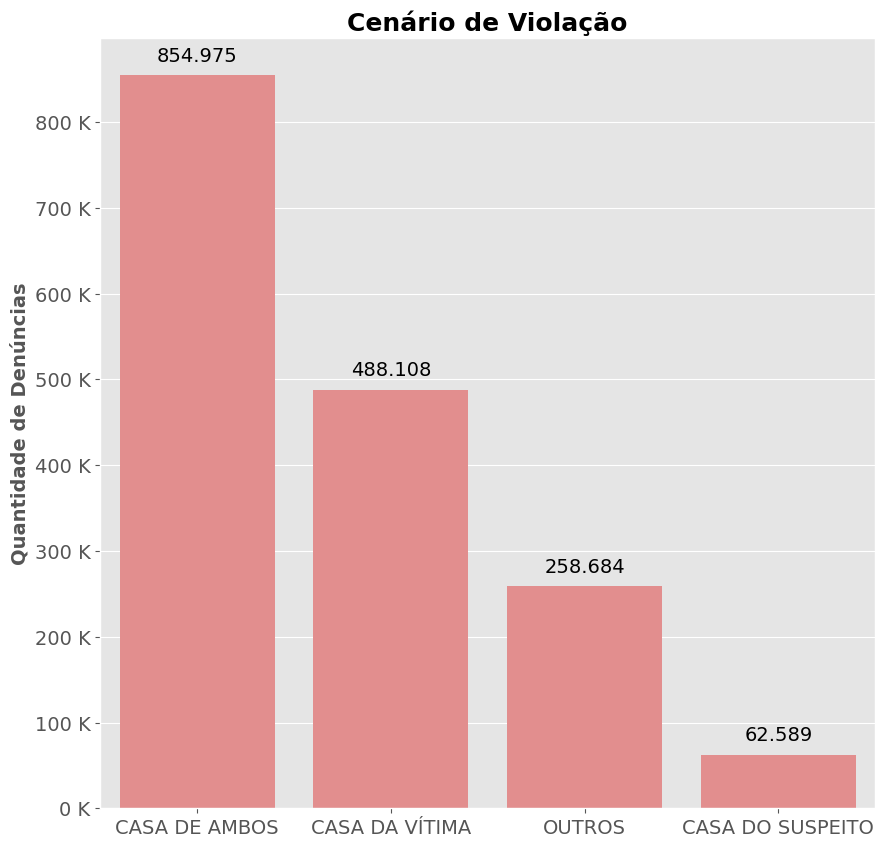

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Crie uma nova coluna que agrupa os locais públicos
data['Local'] = data['Cenário_da_violação'].apply(lambda x: x if x in ['CASA ONDE RESIDE A VÍTIMA E O SUSPEITO', 'CASA DA VÍTIMA', 'CASA DO SUSPEITO'] else 'OUTROS')

# Renomeie as categorias no eixo x
mapping = {
    'CASA ONDE RESIDE A VÍTIMA E O SUSPEITO': 'CASA DE AMBOS',
    'CASA DA VÍTIMA': 'CASA DA VÍTIMA',
    'CASA DO SUSPEITO': 'CASA DO SUSPEITO',
    'OUTROS': 'OUTROS'
}

data['Local'] = data['Local'].replace(mapping)

# Defina a ordem personalizada
custom_order = ['CASA DE AMBOS', 'CASA DA VÍTIMA', 'OUTROS', 'CASA DO SUSPEITO']

# Configura o tamanho da figura (reduzido)
fig, axs = plt.subplots(figsize=(10, 10))  # Reduza o tamanho da figura

# Criando as barras com a nova coluna 'Local' e a ordem personalizada das categorias
bars = sns.countplot(x=data['Local'], order=custom_order, ax=axs, color="lightcoral")

# Aumentar o tamanho da fonte do título
plt.title('Cenário de Violação', fontsize=18, fontweight='bold')

# Aumentar o tamanho da fonte dos rótulos dos eixos
axs.set_ylabel('Quantidade de Denúncias', fontsize=14, fontweight='bold')
axs.set_xlabel('', fontsize=14)  # Rótulo do eixo x vazio

# Aumentar o tamanho da fonte dos números nas barras
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 14),  # Aumentar a distância e o tamanho dos números
                   textcoords='offset points',
                   fontsize=14)  # Aumentar o tamanho dos números nas barras

# Atualizar a formatação do eixo Y para milhar (K)
def thousands_formatter(x, pos):
    return '{:.0f} K'.format(x * 1e-3)
axs.yaxis.set_major_formatter(mticker.FuncFormatter(thousands_formatter))
axs.yaxis.set_tick_params(labelsize=14)  # Tamanho da fonte aumentado

# Aumentar o tamanho da fonte dos rótulos no eixo x
axs.set_xticklabels(custom_order, rotation=0, fontsize=14)  # Rótulos da legenda e tamanho da fonte aumentado

plt.show()

### 2.5 - Frequência de ocorrência das violências:

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Frequência'] = data['Frequência'].astype('category')

data['Frequência'].value_counts()

DIARIAMENTE          1217437
SEMANALMENTE          119531
OCASIONALMENTE        115580
NÃO SABE INFORMAR      96544
ÚNICA OCORRÊNCIA       93785
MENSALMENTE            19073
Name: Frequência, dtype: int64

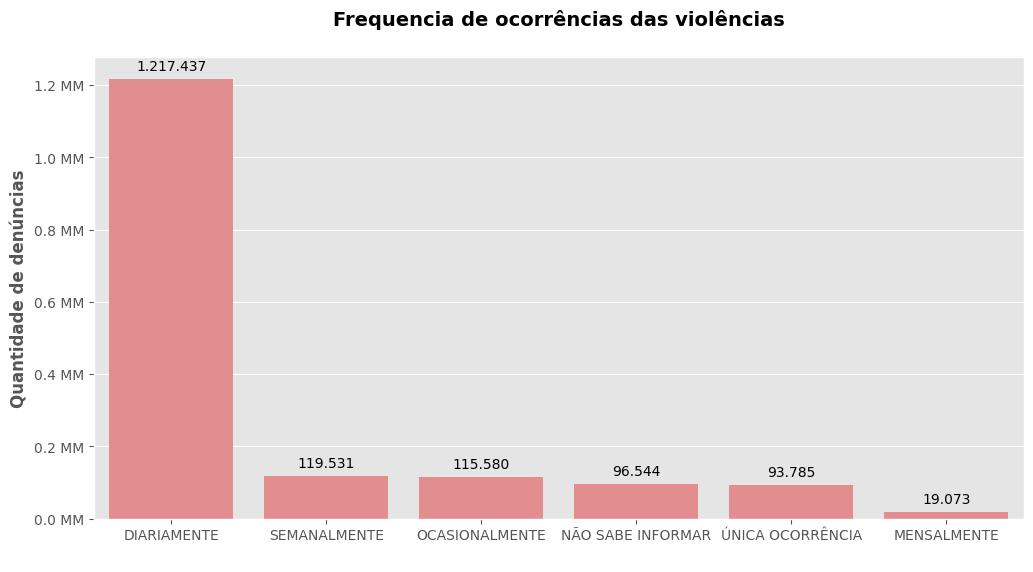

In [ ]:
#gráfico para analisar representatividade:
fig, axs = plt.subplots(figsize=(12, 6))

# Criando as barras:
bars = sns.countplot(x=data['Frequência'], order=data['Frequência'].value_counts().index, ax=axs, color="lightcoral")

# Adiciona o título:
plt.title('Frequencia de ocorrências das violências', fontsize=14, fontweight='bold', y=1.05)

# Define os rótulos dos eixos:
axs.set_xlabel(' ', fontsize=10, fontweight='bold')
axs.set_ylabel('Quantidade de denúncias', fontsize=12, fontweight='bold')

# Adiciona os números em cima das barras com pontos como separadores de milhar:
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# Ajusta a formatação do eixo Y
def millions_formatter(x, pos):
    return '{:.1f} MM'.format(x * 1e-6)
axs.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Início_das_violações'] = data['Início_das_violações'].astype('category')

data['Início_das_violações'].value_counts()

HÁ MAIS DE UM ANO        554571
HÁ MAIS DE SEIS MESES    247184
HÁ UM MÊS                234312
NÃO SABE INFORMAR        180814
HÁ MAIS DE CINCO ANOS    164422
NÃO SE APLICA            113118
HÁ MAIS DE DEZ ANOS      106832
HÁ UMA SEMANA             59616
Name: Início_das_violações, dtype: int64

In [ ]:
data['Início_das_violações'].value_counts().sum()

1660869

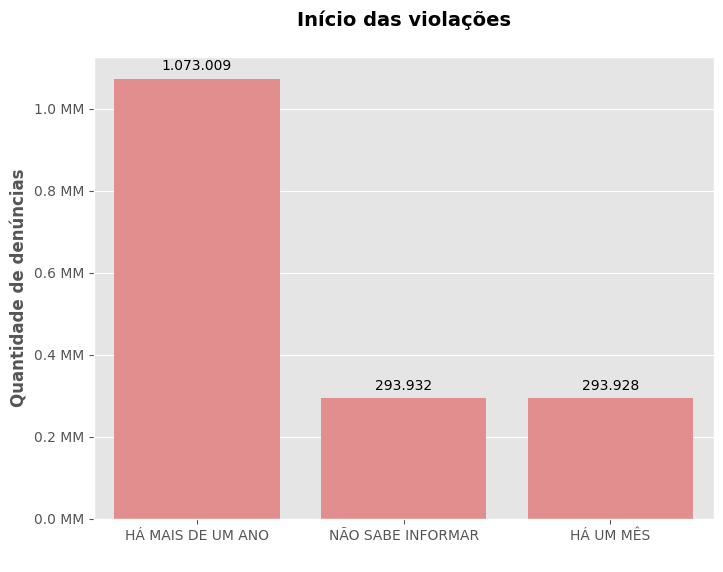

In [ ]:
# Crie uma nova coluna 'Período' com base nos critérios de tempo
data['Período'] = data['Início_das_violações'].map({
    'HÁ MAIS DE UM ANO': 'HÁ MAIS DE UM ANO',
    'HÁ MAIS DE SEIS MESES': 'HÁ MAIS DE UM ANO',
    'HÁ UM MÊS': 'HÁ UM MÊS',
    'HÁ MAIS DE CINCO ANOS': 'HÁ MAIS DE UM ANO',
    'NÃO SABE INFORMAR': 'NÃO SABE INFORMAR',
    'NÃO SE APLICA': 'NÃO SABE INFORMAR',
    'HÁ MAIS DE DEZ ANOS': 'HÁ MAIS DE UM ANO',
    'HÁ UMA SEMANA': 'HÁ UM MÊS'
})

#gráfico para analisar representatividade:
fig, axs = plt.subplots(figsize=(8, 6))

# Criando as barras:
bars = sns.countplot(x=data['Período'], order=data['Período'].value_counts().index, ax=axs, color="lightcoral")

# Adiciona o título:
plt.title('Início das violações', fontsize=14, fontweight='bold', y=1.05)

# Define os rótulos dos eixos:
axs.set_xlabel(' ', fontsize=10, fontweight='bold')
axs.set_ylabel('Quantidade de denúncias', fontsize=12, fontweight='bold')

# Adiciona os números em cima das barras com pontos como separadores de milhar:
for p in bars.patches:
    value = '{:,.0f}'.format(p.get_height()).replace(',', '.')
    bars.annotate(value,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# Ajusta a formatação do eixo Y
def millions_formatter(x, pos):
    return '{:.1f} MM'.format(x * 1e-6)
axs.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

As vítimas permanecem em contato com o agressor, mesmo após a ocorrência do crime, possivelmente pela relação que estabelecem, pelo ambiente onde ocorrem os fatos.

### 2.6 - Motivação:

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Motivação'] = data['Motivação'].astype('category')

# Configurações no pandas
pd.set_option("display.max_rows", 80)

data['Motivação'].value_counts()

AGRAVANTE.POR CONDUTAS EXCESSIVAS/DESNECESSÁRIAS/DESACONSELHADAS                                218847
AGRAVANTE.NA RELAÇÃO FAMILIAR                                                                   192727
MOTIVAÇÃO.EM RAZÃO DA IDADE                                                                     179307
AGRAVANTE.DA COABITAÇÃO/CONVIVÊNCIA FAMILIAR/RELAÇÃO AFETIVA                                    121547
AGRAVANTE.COM HUMILHAÇÃO                                                                         86650
MOTIVAÇÃO.EM RAZÃO DE CONDIÇÕES FÍSICAS, SENSORIAIS, INTELECTUAIS OU MENTAIS                     56447
MOTIVAÇÃO.EM RAZÃO DE SER MULHER                                                                 46561
AGRAVANTE.POR MOTIVO VIL, TORPE, INSIDIOSO, CRUEL, À TRAIÇÃO, OU POR DINHEIRO                    44264
AGRAVANTE.FOI PRATICADO POR DUAS OU MAIS PESSOAS                                                 37784
MOTIVAÇÃO.EM RAZÃO DE CONFLITO DE IDEIAS                                 

In [ ]:
import pandas as pd

data = {
    'Motivação': [
        'MOTIVAÇÃO.EM RAZÃO DA IDADE',
        'MOTIVAÇÃO.EM RAZÃO DE CONDIÇÕES FÍSICAS, SENSORIAIS, INTELECTUAIS OU MENTAIS',
        'MOTIVAÇÃO.EM RAZÃO DE SER MULHER',
        'MOTIVAÇÃO.EM RAZÃO DE CONFLITO DE IDEIAS',
        'MOTIVAÇÃO.PARA OBTENÇÃO DE BENEFÍCIO FINANCEIRO/GANÂNCIA',
        'MOTIVAÇÃO.EM RAZÃO DE QUAISQUER FORMAS DE DISCRIMINAÇÃO',
        'MOTIVAÇÃO.EM RAZÃO DA RELAÇÃO DE ENSINO',
        'MOTIVAÇÃO.EM RAZÃO DE ORIENTAÇÃO SEXUAL',
        'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO SEXUAL',
        'MOTIVAÇÃO.PARA FINS DE ATIVIDADE ILÍCITA',
        'MOTIVAÇÃO.EM RAZÃO DA RELIGIÃO',
        'MOTIVAÇÃO.EM RAZÃO DE RAÇA/COR',
        'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.INFORMAL',
        'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.OUTROS',
        'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.DOMÉSTICO',
        'MOTIVAÇÃO.EM RAZÃO DA PROFISSÃO',
        'MOTIVAÇÃO.EM RAZÃO DA ORIGEM',
        'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.RURAL',
        'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.COMÉRCIO/ INDÚSTRIA',
        'MOTIVAÇÃO.EM RAZÃO DA ETNIA',
        'MOTIVAÇÃO.PARA FINS DE ADOÇÃO',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE COMUNIDADES TRADICIONAIS',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.INDÍGENAS',
        'MOTIVAÇÃO.EM RAZÃO DE SER COMUNICADOR SOCIAL',
        'MOTIVAÇÃO.POR CRIME AMBIENTAL.PARA EXPANSÃO AGROPECUÁRIA',
        'MOTIVAÇÃO.NA REGULARIZAÇÃO FUNDIÁRIA',
        'MOTIVAÇÃO.POR CRIME AMBIENTAL.PARA EXPANSÃO URBANA',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.QUILOMBOLAS',
        'MOTIVAÇÃO.POR CRIME AMBIENTAL.COM FINS DE EXTRATIVISMO.MINERAL',
        'MOTIVAÇÃO.POR CRIME AMBIENTAL.DE CAÇA',
        'MOTIVAÇÃO.POR CRIME AMBIENTAL.PESCA',
        'MOTIVAÇÃO.PARA FINS DE REMOÇÃO DE ÓRGÃOS/TRÁFICO DE ÓRGÃOS',
        'MOTIVAÇÃO.POR CRIME AMBIENTAL.COM FINS DE EXTRATIVISMO.VEGETAL',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO DE CAÇA',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE EXPANSÃO URBANA',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE GARIMPAGEM',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE EXPANSÃO AGROPECUÁRIA',
        'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.PESCA',
        'MOTIVAÇÃO.POR CRIME AMBIENTAL.COM FINS DE GARIMPAGEM'
    ],
    'Quantidade': [
        179307,
        56447,
        46561,
        27604,
        17540,
        4546,
        3901,
        2859,
        1628,
        1297,
        1106,
        1077,
        898,
        896,
        677,
        560,
        540,
        539,
        502,
        303,
        50,
        20,
        19,
        15,
        14,
        12,
        9,
        8,
        8,
        8,
        7,
        6,
        6,
        5,
        4,
        4,
        3,
        3,
        2
    ]
}

df = pd.DataFrame(data)
print(df)

                                            Motivação  Quantidade
0                         MOTIVAÇÃO.EM RAZÃO DA IDADE      179307
1   MOTIVAÇÃO.EM RAZÃO DE CONDIÇÕES FÍSICAS, SENSO...       56447
2                    MOTIVAÇÃO.EM RAZÃO DE SER MULHER       46561
3            MOTIVAÇÃO.EM RAZÃO DE CONFLITO DE IDEIAS       27604
4   MOTIVAÇÃO.PARA OBTENÇÃO DE BENEFÍCIO FINANCEIR...       17540
5   MOTIVAÇÃO.EM RAZÃO DE QUAISQUER FORMAS DE DISC...        4546
6             MOTIVAÇÃO.EM RAZÃO DA RELAÇÃO DE ENSINO        3901
7             MOTIVAÇÃO.EM RAZÃO DE ORIENTAÇÃO SEXUAL        2859
8            MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO SEXUAL        1628
9            MOTIVAÇÃO.PARA FINS DE ATIVIDADE ILÍCITA        1297
10                     MOTIVAÇÃO.EM RAZÃO DA RELIGIÃO        1106
11                     MOTIVAÇÃO.EM RAZÃO DE RAÇA/COR        1077
12  MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO....         898
13  MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO....         896
14  MOTIVA

In [ ]:
motivacao_categoria = {
    'MOTIVAÇÃO.EM RAZÃO DA IDADE': 'Idade',
    'MOTIVAÇÃO.EM RAZÃO DE CONDIÇÕES FÍSICAS, SENSORIAIS, INTELECTUAIS OU MENTAIS': 'Físicas/Mentais',
    'MOTIVAÇÃO.EM RAZÃO DE SER MULHER': 'Gênero',
    'MOTIVAÇÃO.EM RAZÃO DE CONFLITO DE IDEIAS': 'Relações',
    'MOTIVAÇÃO.PARA OBTENÇÃO DE BENEFÍCIO FINANCEIRO/GANÂNCIA': 'Exploração',
    'MOTIVAÇÃO.EM RAZÃO DE QUAISQUER FORMAS DE DISCRIMINAÇÃO': 'Discriminação',
    'MOTIVAÇÃO.EM RAZÃO DA RELAÇÃO DE ENSINO': 'Relações',
    'MOTIVAÇÃO.EM RAZÃO DE ORIENTAÇÃO SEXUAL': 'Gênero',
    'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO SEXUAL': 'Exploração',
    'MOTIVAÇÃO.PARA FINS DE ATIVIDADE ILÍCITA': 'Exploração',
    'MOTIVAÇÃO.EM RAZÃO DA RELIGIÃO': 'Religião/Raça/Origem',
    'MOTIVAÇÃO.EM RAZÃO DE RAÇA/COR': 'Religião/Raça/Origem',
    'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.INFORMAL': 'Exploração',
    'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.OUTROS': 'Exploração',
    'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.DOMÉSTICO': 'Exploração',
    'MOTIVAÇÃO.EM RAZÃO DA PROFISSÃO': 'Outros',
    'MOTIVAÇÃO.EM RAZÃO DA ORIGEM': 'Religião/Raça/Origem',
    'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.RURAL': 'Exploração',
    'MOTIVAÇÃO.PARA FINS DE EXPLORAÇÃO DO TRABALHO.COMÉRCIO/ INDÚSTRIA': 'Exploração',
    'MOTIVAÇÃO.EM RAZÃO DA ETNIA': 'Religião/Raça/Origem',
    'MOTIVAÇÃO.PARA FINS DE ADOÇÃO': 'Outros',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE COMUNIDADES TRADICIONAIS': 'Conflito Agrário',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.INDÍGENAS': 'Conflito Agrário',
    'MOTIVAÇÃO.EM RAZÃO DE SER COMUNICADOR SOCIAL': 'Outros',
    'MOTIVAÇÃO.POR CRIME AMBIENTAL.PARA EXPANSÃO AGROPECUÁRIA': 'Outros',
    'MOTIVAÇÃO.NA REGULARIZAÇÃO FUNDIÁRIA': 'Outros',
    'MOTIVAÇÃO.POR CRIME AMBIENTAL.PARA EXPANSÃO URBANA': 'Outros',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.QUILOMBOLAS': 'Conflito Agrário',
    'MOTIVAÇÃO.POR CRIME AMBIENTAL.COM FINS DE EXTRATIVISMO.MINERAL': 'Outros',
    'MOTIVAÇÃO.POR CRIME AMBIENTAL.DE CAÇA': 'Outros',
    'MOTIVAÇÃO.POR CRIME AMBIENTAL.PESCA': 'Outros',
    'MOTIVAÇÃO.PARA FINS DE REMOÇÃO DE ÓRGÃOS/TRÁFICO DE ÓRGÃOS': 'Outros',
    'MOTIVAÇÃO.POR CRIME AMBIENTAL.COM FINS DE EXTRATIVISMO.VEGETAL': 'Outros',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO DE CAÇA': 'Conflito Agrário',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE EXPANSÃO URBANA': 'Conflito Agrário',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE GARIMPAGEM': 'Conflito Agrário',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.DE EXPANSÃO AGROPECUÁRIA': 'Conflito Agrário',
    'MOTIVAÇÃO.POR CONFLITO AGRÁRIO.PESCA': 'Conflito Agrário',
    'MOTIVAÇÃO.POR CRIME AMBIENTAL.COM FINS DE GARIMPAGEM': 'Outros'
}

# Aplicar o mapeamento para criar a coluna de Categoria
df['Categoria'] = df['Motivação'].apply(lambda x: motivacao_categoria.get(x, 'Outros'))

# Agora você tem um DataFrame com a coluna de Categoria
# Imprimir contagem de registros individuais por categoria
contagem_por_categoria = df.groupby('Categoria').agg({'Motivação': 'count', 'Quantidade': 'sum'})
print(contagem_por_categoria)

                      Motivação  Quantidade
Categoria                                  
Conflito Agrário              8          66
Discriminação                 1        4546
Exploração                    8       23977
Físicas/Mentais               1       56447
Gênero                        2       49420
Idade                         1      179307
Outros                       12         697
Relações                      2       31505
Religião/Raça/Origem          4        3026


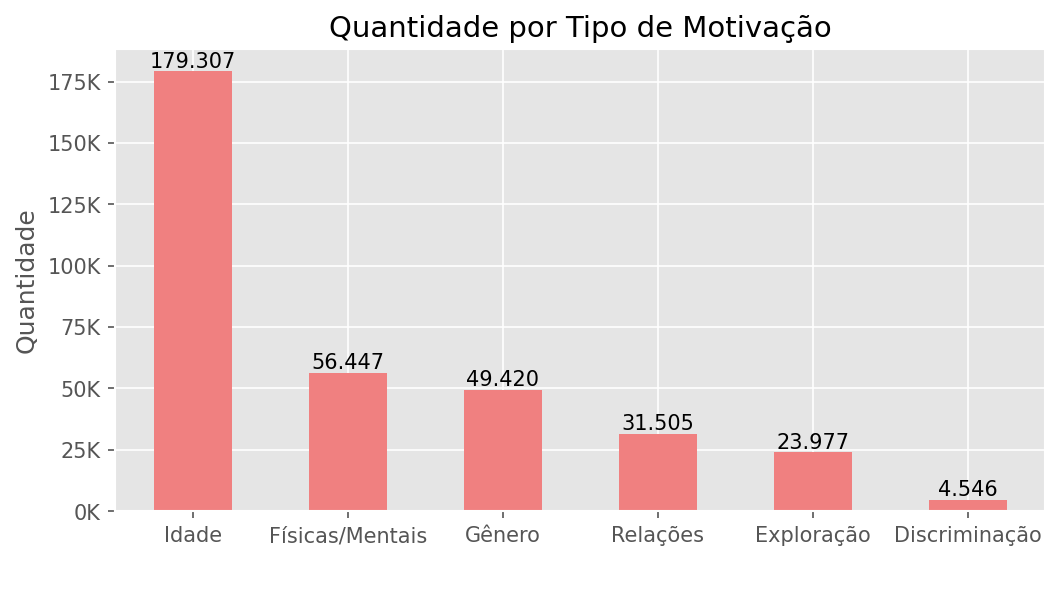

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Filtrar o DataFrame para excluir as categorias "Conflito Agrário" e "Outros"
categorias_desejadas = ['Idade', 'Físicas/Mentais', 'Gênero', 'Relações', 'Exploração', 'Discriminação']
df_filtrado = df[df['Categoria'].isin(categorias_desejadas)]

# Agrupar a soma das quantidades por categoria e classificar em ordem decrescente
quantidades_por_categoria = df_filtrado.groupby('Categoria')['Quantidade'].sum().sort_values(ascending=False)

# Aumentar a resolução (dpi) para melhor qualidade de impressão
plt.figure(figsize=(8, 4), dpi=150)

# Plotar o gráfico de barras com a cor "lightcoral"
ax = quantidades_por_categoria.plot(kind='bar', color='lightcoral')
plt.xlabel(' ')
plt.ylabel('Quantidade', fontsize=12)  # Aumentar o tamanho da fonte no eixo y
plt.title('Quantidade por Tipo de Motivação', fontsize=14)  # Aumentar o tamanho da fonte no título
plt.xticks(rotation=0, fontsize=10)  # Aumentar o tamanho da fonte nos rótulos do eixo x

# Aumentar o tamanho da fonte nos rótulos acima das barras
for i, v in enumerate(quantidades_por_categoria):
    ax.text(i, v, f"{v:,.0f}".replace(",", "."), ha='center', va='bottom', fontsize=10)

# Formatar o eixo y para mostrar os números em formato abreviado com o divisor de milhar representado por um ponto
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

# Salvar o gráfico em um arquivo de imagem (opcional)
plt.savefig('grafico_motivacao.png', bbox_inches='tight')

plt.show()


As motivações podem ser exploradas com maior aprofundamento, já que auxilia na compreensão do que levou o suspeito a efetivar o crime, como são muitas variações, podería ser feito um trabalho de categorização e em seguida uma nova análise.

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Relação_vítima_suspeito'] = data['Relação_vítima_suspeito'].astype('category')

# Configurações no pandas
pd.set_option("display.max_rows", 80)

data['Relação_vítima_suspeito'].value_counts()

KeyError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = {
    'Relação vítima-suspeito': [
        'MÃE', 'FILHO(A)', 'PAI', 'OUTROS', 'COMPANHEIRO(A)', 'IRMÃO(Ã)', 'VIZINHO(A)',
        'ESPOSA(O)', 'EX-COMPANHEIRO(A)', 'PADRASTO/MADRASTA', 'DESCONHECIDO(A)',
        'OUTROS FAMILIARES', 'NETO(A)', 'DIRETOR(A) DE UNIDADE PRISIONAL',
        'PRESTADOR(A) DE SERVIÇO', 'AVÔ(Ó)', 'SOBRINHO(A)', 'TIO(A)', 'EX-ESPOSA(O)',
        'EMPREGADOR/PATRÃO (HIERARQUICAMENTE SUPERIOR)',
        'FUNCIONÁRIO, VOLUNTÁRIO OU PRESTADOR DE SERVIÇO PARA INSTITUIÇÃO',
        'DIRETOR/GESTOR DE INSTITUIÇÃO', 'EX-NAMORADO(A)', 'GENRO/NORA', 'NÃO SABE INFORMAR',
        'CUIDADOR(A)', 'NÃO SE APLICA', 'DIRETOR(A) DE ESCOLA', 'NAMORADO(A)', 'CUNHADO(A)',
        'AMIGO(A)', 'PROFISSIONAL DE SAÚDE', 'PRIMO(A)', 'PROFESSOR(A)',
        'PESSOA COM QUEM MANTÉM/MANTEVE CONVIVÊNCIA FAMILIAR',
        'OUTROS PROFISSIONAIS DA EDUCAÇÃO', 'ENTEADO(A)', 'COMPANHEIRO(A) DA MÃE/DO PAI',
        'MORA NA MESMA RESIDÊNCIA MAS NÃO É FAMILIAR', 'AMIGO(A) DA FAMÍLIA', 'ALUNO(A)',
        'COLEGA DE TRABALHO (MESMO NÍVEL HIERÁRQUICO)', 'SOGRO(A)', 'LÍDER RELIGIOSO(A)',
        'PADRINHO/MADRINHA', 'MOROU NA MESMA RESIDÊNCIA MAS NÃO É FAMILIAR',
        'EMPREGADO (HIERARQUICAMENTE INFERIOR)', 'BISNETO(A)', 'EMPREGADO(A) DOMÉSTICO',
        'PRÓPRIA VÍTIMA', 'TREINADOR(A)/TÉCNICO(A)', 'BISAVÔ(Ó)'
    ],
    'Quantidade': [
        402996, 325171, 133577, 91639, 73745, 68501, 55020, 45926, 41519, 41274, 30290, 27802,
        25853, 22565, 22544, 21146, 21139, 20378, 15774, 15668, 14856, 14303, 13319, 11006,
        10528, 10092, 9447, 8807, 8762, 7135, 5895, 5512, 5511, 5007, 4461, 4146, 3908, 3465,
        2860, 2330, 2322, 2251, 2158, 1807, 801, 791, 619, 477, 324, 265, 244, 17
    ]
}

# Criar o DataFrame "parentesco"
parentesco = pd.DataFrame(data)

# Defina o mapeamento de tipos de relação para grupos
mapeamento = {
    'MÃE': 'Família',
    'PAI': 'Família',
    'FILHO(A)': 'Família',
    'IRMÃO(Ã)': 'Família',
    'COMPANHEIRO(A)': 'Cônjuge/Companheiro',
    'ESPOSA(O)': 'Cônjuge/Companheiro',
    'EX-COMPANHEIRO(A)': 'Cônjuge/Companheiro',
    'VIZINHO(A)': 'Vizinho',
    'PADRASTO/MADRASTA': 'Família',
    'DESCONHECIDO(A)': 'Outros',
    'OUTROS FAMILIARES': 'Família',
    'NETO(A)': 'Família',
    'DIRETOR(A) DE UNIDADE PRISIONAL': 'Profissional',
    'PRESTADOR(A) DE SERVIÇO': 'Profissional',
    'AVÔ(Ó)': 'Família',
    'SOBRINHO(A)': 'Família',
    'TIO(A)': 'Família',
    'EX-ESPOSA(O)': 'Cônjuge/Companheiro',
    'EMPREGADOR/PATRÃO (HIERARQUICAMENTE SUPERIOR)': 'Profissional',
    'FUNCIONÁRIO, VOLUNTÁRIO OU PRESTADOR DE SERVIÇO PARA INSTITUIÇÃO': 'Profissional',
    'DIRETOR/GESTOR DE INSTITUIÇÃO': 'Profissional',
    'EX-NAMORADO(A)': 'Cônjuge/Companheiro',
    'GENRO/NORA': 'Família',
    'NÃO SABE INFORMAR': 'Outros',
    'CUIDADOR(A)': 'Profissional',
    'NÃO SE APLICA': 'Outros',
    'DIRETOR(A) DE ESCOLA': 'Profissional',
    'NAMORADO(A)': 'Cônjuge/Companheiro',
    'CUNHADO(A)': 'Família',
    'AMIGO(A)': 'Amigo',
    'PROFISSIONAL DE SAÚDE': 'Profissional',
    'PRIMO(A)': 'Família',
    'PROFESSOR(A)': 'Profissional',
    'PESSOA COM QUEM MANTÉM/MANTEVE CONVIVÊNCIA FAMILIAR': 'Família',
    'OUTROS PROFISSIONAIS DA EDUCAÇÃO': 'Profissional',
    'ENTEADO(A)': 'Família',
    'COMPANHEIRO(A) DA MÃE/DO PAI': 'Família',
    'MORA NA MESMA RESIDÊNCIA MAS NÃO É FAMILIAR': 'Outros',
    'AMIGO(A) DA FAMÍLIA': 'Amigo',
    'ALUNO(A)': 'Profissional',
    'COLEGA DE TRABALHO (MESMO NÍVEL HIERÁRQUICO)': 'Profissional',
    'SOGRO(A)': 'Família',
    'LÍDER RELIGIOSO(A)': 'Profissional',
    'PADRINHO/MADRINHA': 'Família',
    'MOROU NA MESMA RESIDÊNCIA MAS NÃO É FAMILIAR': 'Outros',
    'EMPREGADO (HIERARQUICAMENTE INFERIOR)': 'Profissional',
    'BISNETO(A)': 'Família',
    'EMPREGADO(A) DOMÉSTICO': 'Profissional',
    'PRÓPRIA VÍTIMA': 'Outros',
    'TREINADOR(A)/TÉCNICO(A)': 'Profissional',
    'BISAVÔ(Ó)': 'Família',
}

# Crie a coluna 'Grupo de Relação' usando o mapeamento
parentesco['Grupo de Relação'] = parentesco['Relação vítima-suspeito'].map(mapeamento).fillna('Outros')

print(parentesco)

                              Relação vítima-suspeito  Quantidade  \
0                                                 MÃE      402996   
1                                            FILHO(A)      325171   
2                                                 PAI      133577   
3                                              OUTROS       91639   
4                                      COMPANHEIRO(A)       73745   
5                                            IRMÃO(Ã)       68501   
6                                          VIZINHO(A)       55020   
7                                           ESPOSA(O)       45926   
8                                   EX-COMPANHEIRO(A)       41519   
9                                   PADRASTO/MADRASTA       41274   
10                                    DESCONHECIDO(A)       30290   
11                                  OUTROS FAMILIARES       27802   
12                                            NETO(A)       25853   
13                    DIRETOR(A) D

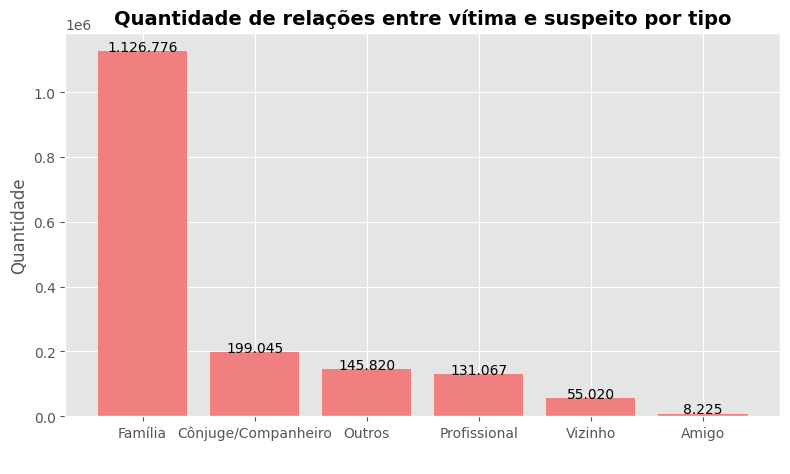

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Seu código para criar o DataFrame e mapear os grupos de relação

# Agregar os dados por grupo de relação e calcular a quantidade total
grouped_data = parentesco.groupby('Grupo de Relação')['Quantidade'].sum().reset_index()

# Ordenar os dados em ordem decrescente
grouped_data = grouped_data.sort_values(by='Quantidade', ascending=False)

# Dimensões menores para o gráfico
plt.figure(figsize=(8, 5))

# Criar um gráfico de barras verticais com as especificações desejadas
bars = plt.bar(grouped_data['Grupo de Relação'], grouped_data['Quantidade'], color='lightcoral')
plt.ylabel('Quantidade', fontsize=12)  # Aumentando o tamanho da fonte
plt.xlabel(' ')
plt.title('Quantidade de relações entre vítima e suspeito por tipo', fontweight='bold', fontsize=14)  # Aumentando o tamanho da fonte

# Formatando os valores nas barras com divisor de milhares com ponto
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', '.'), ha='center', fontsize=10)  # Aumentando o tamanho da fonte

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()  # Melhora o espaçamento do gráfico
plt.show()


Como o grau de parentesco tem grandes variações, optamos por classificar em parente e não parente para analisar a relação.

### 2.6 - Outros aspectos sobre a vítima:

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Sexo_da_vítima'] = data['Sexo_da_vítima'].astype('category')

# Configurações no pandas
pd.set_option("display.max_rows", 80)

data['Sexo_da_vítima'].value_counts()

FEMININO                                     999535
MASCULINO                                    568888
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA     62486
NÃO INFORMADO                                 19736
INTERSEXO                                       752
Name: Sexo_da_vítima, dtype: int64

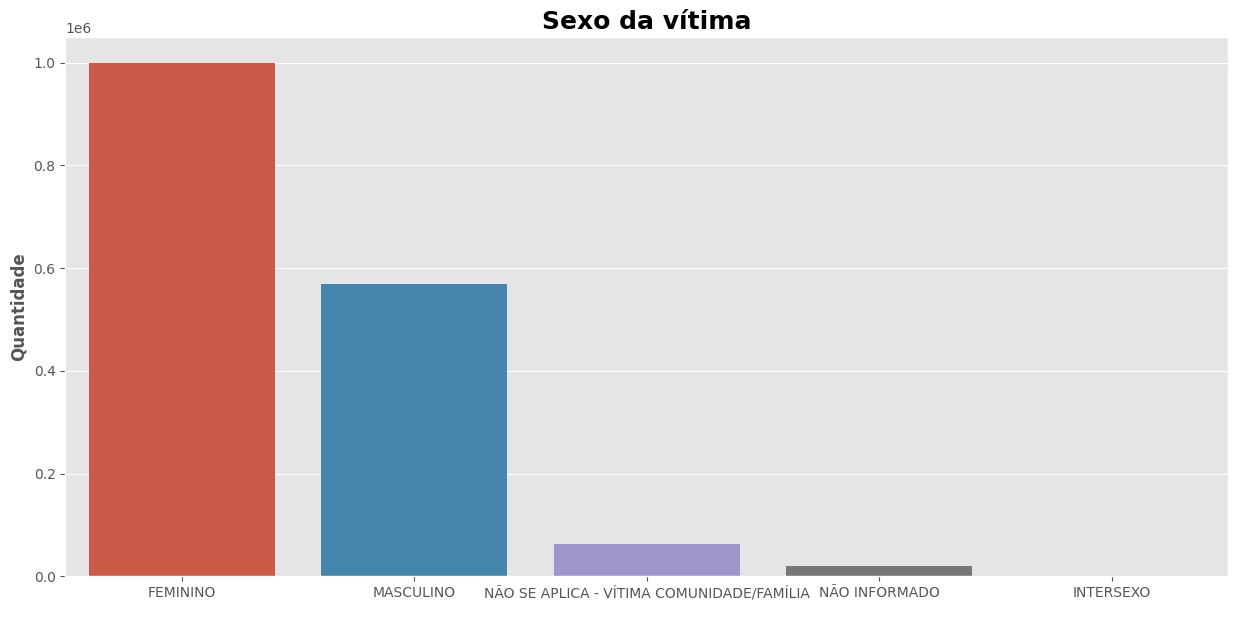

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(15, 7))
sns.countplot(x=data['Sexo_da_vítima'],label="Sexo da vítima", order=data['Sexo_da_vítima'].value_counts().index)
plt.title('Sexo da vítima', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Faixa_etária_da_vítima'] = data['Faixa_etária_da_vítima'] .astype('category')

# Configurações no pandas
pd.set_option("display.max_rows", 80)

data['Faixa_etária_da_vítima'].value_counts()

70 A 74 ANOS                               91430
80 A 84 ANOS                               84378
75 A 79 ANOS                               75407
65 A 69 ANOS                               72832
60 A 64 ANOS                               71653
40 A 44 ANOS                               67038
30 A 34 ANOS                               64069
35 A 39 ANOS                               60647
25 A 29 ANOS                               53039
85 A 89 ANOS                               51290
45 A 49 ANOS                               49057
20 A 24 ANOS                               48165
05 ANOS                                    46216
50 A 54 ANOS                               44854
07 ANOS                                    44808
08 ANOS                                    44318
04 ANOS                                    43567
12 ANOS                                    42061
10 ANOS                                    41273
06 ANOS                                    41185
03 ANOS             

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(50, 7))
sns.countplot(x=data['Faixa etária da vítima'],label="Início das violações", order=data['Faixa etária da vítima'].value_counts().index)
plt.title('Faixa etária da vítima', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Grau de instrução da vítima'] = data['Grau de instrução da vítima'].astype('category')

# Configurações no pandas
pd.set_option("display.max_rows", 30)

data['Grau de instrução da vítima'].value_counts()

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(30, 7))
sns.countplot(x=data['Grau de instrução da vítima'],label="Grau de instrução da vítima", order=data['Grau de instrução da vítima'].value_counts().index)
plt.title('Grau de instrução da vítima', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Raça_Cor_da_vítima'] = data['Raça_Cor_da_vítima'].astype('category')

data['Raça_Cor_da_vítima'].value_counts()

BRANCA           612919
PARDA            546804
PRETA            167195
NÃO INFORMADO    161354
INDÍGENA           5085
AMARELA            5058
Name: Raça_Cor_da_vítima, dtype: int64

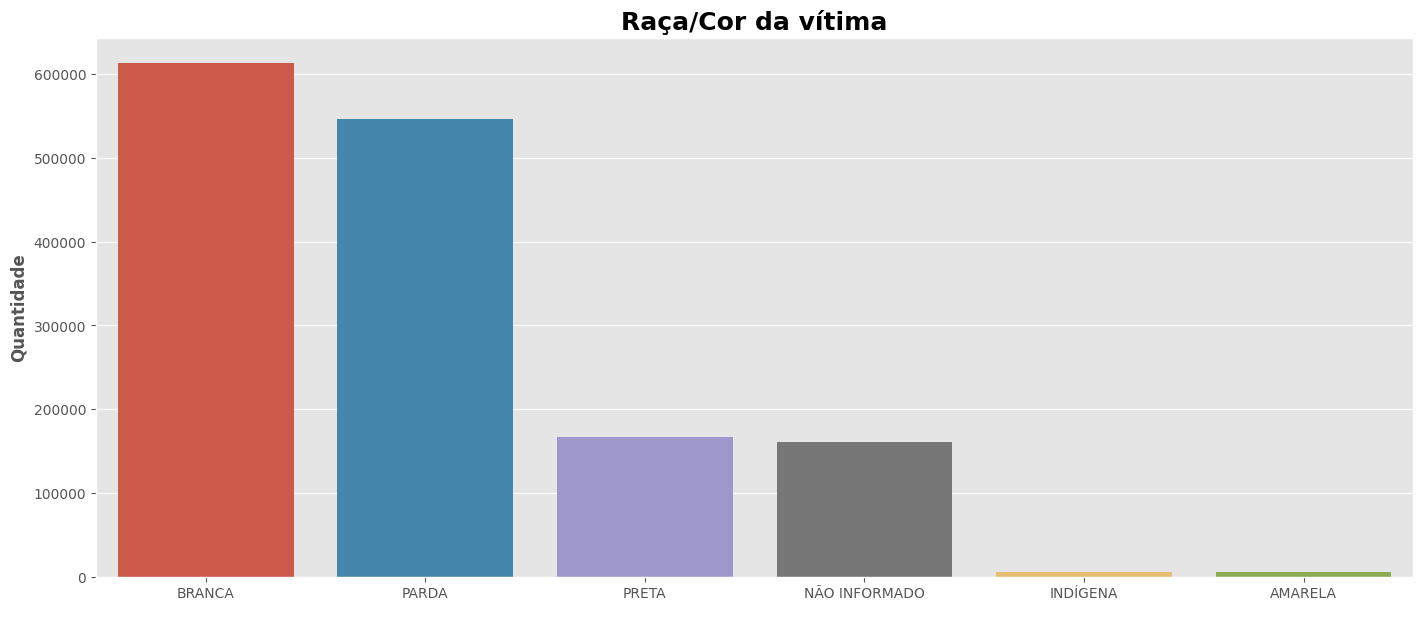

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(17, 7))
sns.countplot(x=data['Raça_Cor_da_vítima'],label="Início das violações", order=data['Raça_Cor_da_vítima'].value_counts().index)
plt.title('Raça/Cor da vítima', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Faixa de renda da vítima'] = data['Faixa de renda da vítima'].astype('category')

data['Faixa de renda da vítima'].value_counts()

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(17, 7))
sns.countplot(x=data['Faixa de renda da vítima'],label="Início das violações", order=data['Faixa de renda da vítima'].value_counts().index)
plt.title('', fontsize=18, fontweight='bold')
axs.set_xlabel('Faixa de renda da vítima', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

### 2.7 - Outros aspectos sobre o suspeito:

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Sexo_do_suspeito'] = data['Sexo_do_suspeito'].astype('category')

data['Sexo_do_suspeito'].value_counts()

MASCULINO                                    745863
FEMININO                                     715303
NÃO INFORMADO                                 20373
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA      5077
INTERSEXO                                       308
Name: Sexo_do_suspeito, dtype: int64

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(10, 7))
sns.countplot(x=data['Sexo do suspeito'],label="Início das violações", order=data['Sexo do suspeito'].value_counts().index)
plt.title('Sexo do suspeito', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Faixa etária do suspeito'] = data['Faixa etária do suspeito'].astype('category')

data['Faixa etária do suspeito'].value_counts()

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade:

fig,axs = plt.subplots(figsize=(30, 7))
sns.countplot(x=data['Faixa etária do suspeito'],label="Início das violações", order=data['Faixa etária do suspeito'].value_counts().index)
plt.title('Faixa etária do suspeito', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Suspeito preso'] = data['Suspeito preso'].astype('category')

data['Suspeito preso'].value_counts()

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(17, 7))
sns.countplot(x=data['Suspeito preso'],label="Suspeito preso", order=data['Suspeito preso'].value_counts().index)
plt.title('Suspeito preso', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Grau de instrução do suspeito'] = data['Grau de instrução do suspeito'].astype('category')

data['Grau de instrução do suspeito'].value_counts()

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(40, 7))
sns.countplot(x=data['Grau de instrução do suspeito'],label="Início das violações", order=data['Grau de instrução do suspeito'].value_counts().index)
plt.title('Grau de instrução do suspeito', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Raça\Cor do suspeito'] = data['Raça\Cor do suspeito'].astype('category')

data['Raça\Cor do suspeito'].value_counts()

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(17, 7))
sns.countplot(x=data['Raça\Cor do suspeito'],label="Início das violações", order=data['Raça\Cor do suspeito'].value_counts().index)
plt.title('Raça\Cor do suspeito', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['Faixa de renda do suspeito'] = data['Faixa de renda do suspeito'].astype('category')

data['Faixa de renda do suspeito'].value_counts()

In [ ]:
#plotando um gráfico de barras para visualizar a representatividade dos canais:

fig,axs = plt.subplots(figsize=(15, 7))
sns.countplot(x=data['Faixa de renda do suspeito'],label="Início das violações", order=data['Faixa de renda do suspeito'].value_counts().index)
plt.title('Faixa de renda do suspeito', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel('Quantidade', fontsize=12, fontweight='bold', ha='center' )

plt.show()

In [ ]:
#converte os dados dessa coluna de "object" para "category":
data['violacao'] = data['violacao'].astype('category')

# Configurações no pandas
pd.set_option("display.max_rows", 300)

data['violacao'].value_counts()

INTEGRIDADE>NEGLIGÊNCIA                                                                                                                                                  175736
INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE                                                                                                                            167708
INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA                                                                                                                                    155039
INTEGRIDADE>FÍSICA>MAUS TRATOS                                                                                                                                           149585
INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO                                                                                                                                     108871
INTEGRIDADE>PSÍQUICA>INSUBSISTÊNCIA AFETIVA                                                                             

In [ ]:
import pandas as pd

# Dados de violações com nome e quantidade
dados_violacoes = {
    "DIREITOS CIVIS E POLÍTICOS>LIVRE EXERCÍCIO DO PODER FAMILIAR": 453,
    "DIREITOS CIVIS E POLÍTICOS>PROPRIEDADE>PATRIMÔNIO MATERIAL": 1607,
    "DIREITOS SOCIAIS>ALIMENTAÇÃO": 4308,
    "DIREITOS SOCIAIS>ASSISTÊNCIA AOS DESAMPARADOS": 1018,
    "DIREITOS SOCIAIS>EDUCAÇÃO": 682,
    "DIREITOS SOCIAIS>MORADIA": 850,
    "DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA": 3525,
    "DIREITOS SOCIAIS>SAÚDE": 3721,
    "DIREITOS SOCIAIS>SEGURANÇA": 1733,
    "INTEGRIDADE>FÍSICA>AGRESSÃO ou VIAS DE FATO": 45348,
    "INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE": 50426,
    "INTEGRIDADE>FÍSICA>INSUBSISTÊNCIA INTELECTUAL": 2927,
    "INTEGRIDADE>FÍSICA>INSUBSISTÊNCIA MATERIAL": 16953,
    "INTEGRIDADE>FÍSICA>MAUS TRATOS": 51633,
    "INTEGRIDADE>FÍSICA>OUTROS": 6123,
    "INTEGRIDADE>FÍSICA>SITUAÇÃO DE RUA ou ABANDONO MATERIAL": 5941,
    "INTEGRIDADE>FÍSICA>TORTURA FÍSICA": 4176,
    "INTEGRIDADE>PSÍQUICA>ALIENAÇÃO PARENTAL": 5634,
    "INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO": 55140,
    "INTEGRIDADE>PSÍQUICA>ASSÉDIO MORAL": 682,
    "INTEGRIDADE>PSÍQUICA>ASSÉDIO SEXUAL": 3997,
    "INTEGRIDADE>PSÍQUICA>EXPOSIÇÃO": 31653,
    "INTEGRIDADE>PSÍQUICA>INSUBSISTÊNCIA AFETIVA": 37704,
    "INTEGRIDADE>PSÍQUICA>INJÚRIA": 34741,
    "INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA": 48017,
    "LIBERDADE>DIREITOS INDIVIDUAIS>AUTONOMIA DE VONTADE": 6019,
    "LIBERDADE>DIREITOS INDIVIDUAIS>CÁRCERE PRIVADO": 4836,
    "LIBERDADE>DIREITOS INDIVIDUAIS>CONDIÇÃO ANÁLOGA À DE ESCRAVO>SUBMETER TRABALHADOR A JORNADA EXAUSTIVA": 434,
    "LIBERDADE>DIREITOS INDIVIDUAIS>CONDIÇÃO ANÁLOGA À DE ESCRAVO>SUBMETER TRABALHADOR A TRABALHOS FORÇADOS": 398,
    "LIBERDADE>DIREITOS INDIVIDUAIS>LIBERDADE DE IR VIR PERMANECER": 1438,
    "LIBERDADE>EXPRESSÃO>LIBERDADE DE CONSCIÊNCIA E DE PENSAMENTO": 531,
    "LIBERDADE>SEXUAL>FÍSICA>ABUSO / IMPORTUNAÇÃO SEXUAL FÍSICA": 2733,
    "LIBERDADE>SEXUAL>FÍSICA>ESTUPRO": 8034,
    "LIBERDADE>SEXUAL>PSÍQUICA>ABUSO / IMPORTUNAÇÃO SEXUAL PSÍQUICA": 5151,
    "NÃO INFORMADO": 17672,
    "VIDA>HOMICÍDIO": 418
}

# Converter os dados em um DataFrame
df = pd.DataFrame(dados_violacoes.items(), columns=['Tipo de Violação', 'Quantidade'])

# Mapear as categorias
categorias = {
    "DIREITOS SOCIAIS": "DIREITOS SOCIAIS",
    "INTEGRIDADE>FÍSICA": "INTEGRIDADE FÍSICA",
    "INTEGRIDADE>PSÍQUICA": "INTEGRIDADE PSÍQUICA",
    "LIBERDADE>DIREITOS": "LIBERDADE DIREITOS",
    "LIBERDADE>EXUAL": "LIBERDADE SEXUAL",
    "NÃO INFORMADO": "NÃO INFORMADO",
    "VIDA": "VIDA"
}

# Adicionar a coluna "Categoria" ao DataFrame
df['Categoria'] = df['Tipo de Violação'].apply(lambda x: next((categoria for categoria, valor in categorias.items() if categoria in x), None))

# Exibir o DataFrame
print(df)


                                     Tipo de Violação  Quantidade  \
0   DIREITOS CIVIS E POLÍTICOS>LIVRE EXERCÍCIO DO ...         453   
1   DIREITOS CIVIS E POLÍTICOS>PROPRIEDADE>PATRIMÔ...        1607   
2                        DIREITOS SOCIAIS>ALIMENTAÇÃO        4308   
3       DIREITOS SOCIAIS>ASSISTÊNCIA AOS DESAMPARADOS        1018   
4                           DIREITOS SOCIAIS>EDUCAÇÃO         682   
5                            DIREITOS SOCIAIS>MORADIA         850   
6                DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA        3525   
7                              DIREITOS SOCIAIS>SAÚDE        3721   
8                          DIREITOS SOCIAIS>SEGURANÇA        1733   
9         INTEGRIDADE>FÍSICA>AGRESSÃO ou VIAS DE FATO       45348   
10      INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE       50426   
11      INTEGRIDADE>FÍSICA>INSUBSISTÊNCIA INTELECTUAL        2927   
12         INTEGRIDADE>FÍSICA>INSUBSISTÊNCIA MATERIAL       16953   
13                     INTEGRIDADE

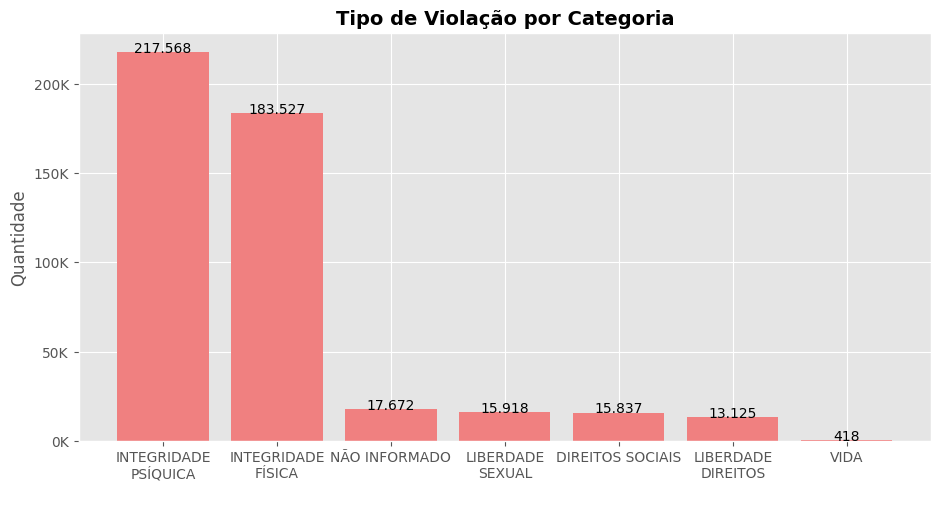

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Seu código para criar o DataFrame com categorias

# Agrupe os dados por categoria e some as quantidades
grouped_data = df.groupby('Categoria')['Quantidade'].sum().reset_index()

# Ordenar os dados em ordem decrescente
grouped_data = grouped_data.sort_values(by='Quantidade', ascending=False)

# Criar um gráfico de barras com as especificações desejadas
plt.figure(figsize=(11, 6))  # Reduzindo o tamanho da figura
bars = plt.bar(grouped_data['Categoria'], grouped_data['Quantidade'], color='lightcoral')
plt.ylabel('Quantidade', fontsize=12)  # Reduzindo o tamanho da fonte do eixo y
plt.xlabel(' ')
plt.title('Tipo de Violação por Categoria', fontweight='bold', fontsize=14)  # Reduzindo o tamanho da fonte do título

# Formatando os valores nas barras com divisor de milhares com ponto
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', '.'), ha='center', fontsize=10)  # Reduzindo o tamanho da fonte dos números nas barras

# Formatando o eixo y para usar K em milhares
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Modificar os rótulos das categorias com quebras de linha e reduzindo o tamanho da fonte
plt.xticks(rotation=0, fontsize=10)
labels = [category.replace('>', '\n') for category in grouped_data['Categoria']]
plt.xticks(grouped_data['Categoria'], labels)

# Ajustando a posição da legenda
plt.subplots_adjust(bottom=0.2)

# Exibir o gráfico
plt.show()
